
Date: 07/10/2019

Version: 1.0

Environment: Python 3.7.4 and Jupyter notebook

Libraries used:
* pandas (for dataframe) 
* re (for regular expression) 
* numpy (for numpy array) 
* networkx ( for calculating distance)

## 1.  Import libraries 

In [1]:
# These are the installed packages

#!pip install networkx
#!pip install geopy
#!pip install seaborn

In [2]:
# Importing libraries to be used in this assessment
import re
import pandas as pd
import numpy as np
import networkx as nx
import time
import seaborn as sb
import matplotlib.pyplot as plt

from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from pandas.plotting import scatter_matrix

#### Initialization for seaborn data

In [3]:
# color list for seaborn graph representation
plt.figure(figsize=(60,60))
color_list = ["purple","green","blue","pink","brown","red","light blue","teal","orange","light green","magenta","yellow","hot pink","light brown","pale green","peach","olive green","dark pink","turquoise","lavender","dark blue","tan","cyan","aqua","forest green","mauve","dark purple","bright green","maroon","olive","salmon","beige","royal blue","navy blue","lilac","black","hot pink","light brown","pale green","peach","olive green","dark pink","cool grey","canary","booger green","muted pink","hazel","dark royal blue","golden","pale lilac"]
current_palette = sb.xkcd_palette(color_list)


<Figure size 4320x4320 with 0 Axes>

## 1.1. Creating Functions

#### Function to read csv file

In [4]:
def read_csv_file(filename):
    data = pd.read_csv(filename)
    return data

#### Function to get dictionary for order_id and branch_code
#### This function gets first four digit of order_id and corresponding branch code.

In [5]:
def get_branch_order(df, b_code):
    bc_dict = {}
    branch_code = pd.DataFrame
    branch_code = df[(df['branch_code'] == b_code)][['order_id', 'branch_code']]
    
    print(branch_code.head(5))
    print('\nThese are the 5 dataset(printed using head(5)) for branch_code = %s' %b_code)
    
    shape = branch_code['order_id'].str[:4].shape
    print('\nThere are total %s values of order_id for branch_code = %s. \nNow we\'ll find how many unique order_id\'s for branch_code = %s present in the data by analysing first four characters of order_id.' %(shape, b_code, b_code))
    
    print('\nDisplaying data: ')
    bc_val = branch_code['order_id'].str[:4].unique()
    print('\nThere are total %s unique values of order_id for branch_code = %s : %s' %(len(bc_val), b_code, bc_val))
    
    for i in bc_val:
        bc_dict[i] = b_code
    print('\nDictionary key value pair for branch_code = %s : %s' %(b_code, bc_dict))
    return bc_dict

#### This function gets dataframe with specified branch code.
#### If we give 'BK' as b_code parameter, it will return dataframe with only branch_code as 'BK'

In [6]:
def get_branch(df, b_code):
    df_branch = pd.DataFrame
    df_branch = df[(df['branch_code'] == b_code)]    
    return df_branch

#### This function returns bool value if the format the input is in time format.

In [7]:
def is_time(input_time):
    try:
        time.strptime(input_time, '%H:%M:%S')
        return True
    except ValueError:
        return False

#### This function returns the closest value from the array given to it compared to the corresponding value.

In [8]:
def get_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#### This method returns day of the week when time is given.

In [9]:
def get_weekday(input_time):
    weekday = datetime.strptime(input_time, '%Y-%m-%d').weekday()
    return weekday

#### This method converts string to timestamp.

In [10]:
def convert_time(input_time):
    true_time = datetime.strptime(input_time, '%H:%M:%S').time()
    return true_time

## 2. Parse given File

#### Given File names

In [11]:
branches = 'branches.csv'
edges = 'edges.csv'
nodes = 'nodes.csv'
dirty_data = 'Group145_dirty_data.csv'
missing_data = 'Group145_missing_data.csv'
outlier_data = 'Group145_outlier_data.csv'

#### Parsing branches.csv

In [12]:
branches_data = read_csv_file(branches)
branches_data.head(3)

,branch_code,branch_name,branch_lat,branch_lon
0,NS,Nickolson,-37.773803,144.983647
1,TP,Thompson,-37.861835,144.905716
2,BK,Bakers,-37.815834,145.046450


#### Parsing edges.csv

In [13]:
edges_data = read_csv_file(edges)
edges_data.head(3)

,Unnamed: 0,u,v,distance(m),street type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0


#### Parsing nodes.csv

In [14]:
nodes_data = read_csv_file(nodes)
nodes_data.head(3)

,node,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817


#### Parsing Dirty Data

In [15]:
dirty_data = read_csv_file(dirty_data)
dirty_data.head(3)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX00699,03-08-2018,15:05:54,Lunch,BK,"[('Chicken', 2), ('Steak', 1)]",109.0,-37.812276,144.973739,0,6.776,12.633699
1,ORDX06260,2018-03-14,10:21:58,Breakfast,BK,"[('Cereal', 6), ('Pancake', 8), ('Coffee', 7),...",548.5,-37.817459,144.977806,0,6.833,11.839359
2,ORDI04941,2018-04-22,11:43:05,Breakfast,NS,"[('Cereal', 5), ('Pancake', 6), ('Coffee', 8),...",464.5,-37.819080,144.953533,0,9.226,16.365409


#### Parsing Missing Data

In [16]:
missing_data = read_csv_file(missing_data)
missing_data.head(3)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX00188,2018-07-12,14:25:21,Lunch,NaN,"[('Steak', 2), ('Salad', 5)]",176.0,-37.827562,144.982878,0,8.053,13.822004
1,ORDZ07051,2018-01-07,08:10:08,Breakfast,NaN,"[('Coffee', 2), ('Cereal', 7)]",162.0,-37.813333,144.937581,1,NaN,8.652942
2,ORDK05872,2018-01-27,08:50:42,Breakfast,BK,"[('Eggs', 1), ('Coffee', 8), ('Cereal', 4)]",166.0,-37.819719,144.941013,0,10.004,17.763737


#### Parsing Outliers Data

In [17]:
outlier_data = read_csv_file(outlier_data)
outlier_data.head(3)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDB06939,2018-08-05,15:05:54,Lunch,TP,"[('Steak', 1), ('Burger', 9), ('Salad', 2), ('...",678.40,-37.811310,144.947670,0,10.443,14.603443
1,ORDJ06566,2018-02-15,09:31:16,Breakfast,TP,"[('Cereal', 9), ('Coffee', 2), ('Eggs', 1), ('...",395.75,-37.811221,145.007362,0,11.672,14.002851
2,ORDX02967,2018-08-31,15:56:37,Lunch,BK,"[('Fries', 9), ('Burger', 3), ('Steak', 9), ('...",674.80,-37.804416,144.959296,0,7.884,14.318144


## 2.1. Analysing Missing Data for processing solution

#### Looking at the shape of missing data

In [18]:
missing_data.shape

(500, 12)

#### There are total 500 entries but 3 columns have missing data..

In [19]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                400 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    450 non-null float64
delivery_fee               450 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


#### There are total:
#### 100 missing data in 'branch_code' 
#### 50 missing data in 'distance_to_customer_KM'
#### 50 missing data in 'delivery_fee'

In [20]:
missing_data.isnull().sum()

order_id                     0
date                         0
time                         0
order_type                   0
branch_code                100
order_items                  0
order_price                  0
customer_lat                 0
customer_lon                 0
customerHasloyalty?          0
distance_to_customer_KM     50
delivery_fee                50
dtype: int64

### 2.1.1. Finding values to impute in <u><i>branch_code</i></u>

#### There are total 3 unique branch codes

In [21]:
missing_data['branch_code'].describe()

count     400
unique      3
top        TP
freq      155
Name: branch_code, dtype: object

In [22]:
missing_data['branch_code'].unique()

array([nan, 'BK', 'NS', 'TP'], dtype=object)

#### From the above output, Unique branch_code are : 'BK', 'NS', 'TP' and nan values. 
#### We need to fill these nan values.

#### Finding unique combination of order_id and branch_code values so that we can findout corresponding value for imputing correct branch code corresponding to order_id.

In [23]:
missing_data['order_id'].str[:4].unique()

array(['ORDX', 'ORDZ', 'ORDK', 'ORDC', 'ORDI', 'ORDJ', 'ORDA', 'ORDY',
       'ORDB'], dtype=object)

#### Here there are total 9 unique values for order id

#### Now finding unique order_id values for Branch code 'BK'

#### Calling function get_branch_code to get dictionary for order-id's of branch_code = 'BK'

In [24]:
bk_dict = get_branch_order(missing_data, 'BK')

     order_id branch_code
2   ORDK05872          BK
4   ORDK01479          BK
6   ORDK09642          BK
11  ORDX05025          BK
13  ORDX03594          BK

These are the 5 dataset(printed using head(5)) for branch_code = BK

There are total (136,) values of order_id for branch_code = BK. 
Now we'll find how many unique order_id's for branch_code = BK present in the data by analysing first four characters of order_id.

Displaying data: 

There are total 3 unique values of order_id for branch_code = BK : ['ORDK' 'ORDX' 'ORDA']

Dictionary key value pair for branch_code = BK : {'ORDK': 'BK', 'ORDX': 'BK', 'ORDA': 'BK'}


#### Similarly calling function get_branch_order to get dictionary values of order_id as key and branch_code = 'NS' as value

In [25]:
ns_dict = get_branch_order(missing_data, 'NS')

     order_id branch_code
5   ORDC00169          NS
7   ORDC10700          NS
8   ORDI06174          NS
10  ORDZ01347          NS
12  ORDZ03004          NS

These are the 5 dataset(printed using head(5)) for branch_code = NS

There are total (109,) values of order_id for branch_code = NS. 
Now we'll find how many unique order_id's for branch_code = NS present in the data by analysing first four characters of order_id.

Displaying data: 

There are total 3 unique values of order_id for branch_code = NS : ['ORDC' 'ORDI' 'ORDZ']

Dictionary key value pair for branch_code = NS : {'ORDC': 'NS', 'ORDI': 'NS', 'ORDZ': 'NS'}


#### Similarly calling function get_branch_order to get dictionary values of order_id as key and branch_code = 'TP' as value

In [26]:
tp_dict = get_branch_order(missing_data, 'TP')
tp_dict

     order_id branch_code
18  ORDY04131          TP
21  ORDY00181          TP
22  ORDB11026          TP
29  ORDB05306          TP
30  ORDY08843          TP

These are the 5 dataset(printed using head(5)) for branch_code = TP

There are total (155,) values of order_id for branch_code = TP. 
Now we'll find how many unique order_id's for branch_code = TP present in the data by analysing first four characters of order_id.

Displaying data: 

There are total 3 unique values of order_id for branch_code = TP : ['ORDY' 'ORDB' 'ORDJ']

Dictionary key value pair for branch_code = TP : {'ORDY': 'TP', 'ORDB': 'TP', 'ORDJ': 'TP'}


{'ORDY': 'TP', 'ORDB': 'TP', 'ORDJ': 'TP'}

#### Merging all branch code to dictionary. Calling the dictionary to see the values.

In [27]:
merged_dict = {}
merged_dict.update(bk_dict)
merged_dict.update(ns_dict)
merged_dict.update(tp_dict)
merged_dict

{'ORDK': 'BK',
 'ORDX': 'BK',
 'ORDA': 'BK',
 'ORDC': 'NS',
 'ORDI': 'NS',
 'ORDZ': 'NS',
 'ORDY': 'TP',
 'ORDB': 'TP',
 'ORDJ': 'TP'}

#### All order_branch pairs are stored in one dictionary.

#### Imputing missing values in Branch Code column

In [28]:
for i in missing_data[missing_data['branch_code'].isnull()].index:
    for key, value in merged_dict.items():
        if key == missing_data['order_id'][i][:4]:
            missing_data.at[i,'branch_code'] =  value

#### Checking if values are imputed for branch_code in the column

In [29]:
missing_data.isnull().sum()

order_id                    0
date                        0
time                        0
order_type                  0
branch_code                 0
order_items                 0
order_price                 0
customer_lat                0
customer_lon                0
customerHasloyalty?         0
distance_to_customer_KM    50
delivery_fee               50
dtype: int64

#### Now the branch code has been imputed.

### 2.1.2. Now Finding values to impute in <u><i>distance_to_customer_KM</i></u>

In [30]:
missing_data['distance_to_customer_KM'].describe()

count    450.000000
mean       8.807938
std        2.575116
min        3.880000
25%        7.804000
50%        8.687500
75%        9.738250
max       51.032000
Name: distance_to_customer_KM, dtype: float64

In [31]:
missing_data.isnull().sum()

order_id                    0
date                        0
time                        0
order_type                  0
branch_code                 0
order_items                 0
order_price                 0
customer_lat                0
customer_lon                0
customerHasloyalty?         0
distance_to_customer_KM    50
delivery_fee               50
dtype: int64

#### There are total 50 missing values in distance_to_customer_KM column

In [32]:
missing_data.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX00188,2018-07-12,14:25:21,Lunch,BK,"[('Steak', 2), ('Salad', 5)]",176.00,-37.827562,144.982878,0,8.053,13.822004
1,ORDZ07051,2018-01-07,08:10:08,Breakfast,NS,"[('Coffee', 2), ('Cereal', 7)]",162.00,-37.813333,144.937581,1,NaN,8.652942
2,ORDK05872,2018-01-27,08:50:42,Breakfast,BK,"[('Eggs', 1), ('Coffee', 8), ('Cereal', 4)]",166.00,-37.819719,144.941013,0,10.004,17.763737
3,ORDC06592,2018-05-20,12:33:48,Lunch,NS,"[('Steak', 2), ('Chicken', 7), ('Salad', 10), ...",596.00,-37.802020,144.957178,0,7.503,14.895055
4,ORDK01479,2018-10-20,17:38:01,Dinner,BK,"[('Pasta', 6), ('Shrimp', 5), ('Fish&Chips', 5...",774.00,-37.810955,144.978538,0,6.171,15.325279
5,ORDC00169,2018-03-31,10:52:23,Breakfast,NS,"[('Coffee', 9), ('Pancake', 5), ('Cereal', 4)]",272.75,-37.807320,144.958225,0,7.801,14.282421
6,ORDK09642,2018-03-10,10:11:49,Breakfast,BK,"[('Coffee', 1), ('Eggs', 3)]",73.50,-37.816883,144.964405,0,7.737,14.913416
7,ORDC10700,2018-06-28,13:54:55,Lunch,NS,"[('Burger', 6), ('Salad', 10), ('Steak', 5), (...",887.00,-37.824761,144.988720,0,9.658,NaN
8,ORDI06174,2018-01-26,08:50:42,Breakfast,NS,"[('Eggs', 4), ('Coffee', 10), ('Cereal', 9), (...",424.75,-37.824431,144.989129,0,9.655,14.673998
9,ORDJ05186,2018-07-05,14:05:04,Lunch,TP,"[('Burger', 1), ('Steak', 4)]",211.00,-37.811512,144.996490,0,NaN,13.581541


#### Initializing edges and nodes for networkx library

In [33]:
# Initializing the list from edge file
edge_list = list(zip(edges_data.u, edges_data.v, edges_data['distance(m)']))

# Initializing list from node file
node_list = list(zip(nodes_data.node))

#### Initializing networkx graph for calculating dijkstra's shortest path.

In [34]:
G = nx.Graph()
G.add_nodes_from(node_list)
G.add_weighted_edges_from(edge_list)

#### Finding node values for customer and branch from given latitude and longitude from dataset and node file

In [35]:
for i in range(len(missing_data)):
    
    # Finding nearest latitude and longitude and then fetching node value from node file.
    lat1 = get_nearest(nodes_data['lat'],missing_data['customer_lat'][i])
    lon1 = get_nearest(nodes_data['lon'],missing_data['customer_lon'][i])
    idx_lat1 = nodes_data.loc[nodes_data['lat'] == lat1].node
    idx_lon1 = nodes_data.loc[nodes_data['lon'] == lon1].node

    if idx_lat1.values[0] == idx_lon1.values[0]:
        # Initializing the nearest node value to the variable.
        node_source = idx_lat1.values[0] & idx_lon1.values[0]
        
    for j in range(len(branches_data)):
        if missing_data.branch_code[i] == branches_data.branch_code[j]:
            # Finding nearest latitude and longitude and then fetching node value from node file.
            lat2 = branches_data.branch_lat[j]
            lon2 = branches_data.branch_lon[j]
            idx_lat2 = nodes_data.loc[nodes_data['lat'] == lat2].node
            idx_lon2 = nodes_data.loc[nodes_data['lon'] == lon2].node

            if idx_lat2.values[0] == idx_lon2.values[0]:
                # Initializing the nearest node value to the variable.
                node_target = idx_lat2.values[0] & idx_lon2.values[0]
                
                # Finding distance of the corresponding node.
                distance = nx.dijkstra_path_length(G, node_source, node_target)/1000
                print(distance)
                
                # Imputing distance to the dataset
                missing_data['distance_to_customer_KM'][i] = distance

8.053
10.039
10.004


/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


7.503
6.171
7.801
7.897
9.658
9.655
10.612
11.118
6.509
10.3
8.079
9.214
8.853
6.72
9.614
9.711
7.803
6.727
10.458
8.421
9.663
9.043
7.807
7.949
8.665
10.042
11.842
8.96
8.512
9.059
8.517
12.509
8.912
8.128
9.745
11.443
9.543
8.138
8.594
9.305
10.058
8.601
6.26
7.793
9.272
8.591
9.26
8.058
9.721
8.507
7.935
7.181
10.257
5.653
5.653
7.686
7.808
11.286
8.136
8.058
6.836
9.016
9.156
8.575
5.714
11.393
6.796
12.978
11.691
10.174
11.695
6.627
7.003
6.213
7.497
10.23
5.895
8.947
8.785
7.941
7.337
8.508
9.077
6.719
11.437
4.269
10.547
12.053
5.346
8.589
8.962
9.563
8.979
10.495
8.43
7.702
8.973
9.479
9.721
8.812
8.938
8.091
7.98
9.271
13.012
5.24
9.498
7.393
11.681
9.954
7.417
8.827
7.437
9.248
8.193
8.666
8.895
9.021
5.175
10.71
8.834
8.728
7.215
6.366
8.919
10.437
6.089
9.09
7.828
12.196
9.987
9.23
8.493
7.128
10.125
10.198
7.868
7.568
6.764
9.052
7.853
7.381
8.015
9.859
8.506
8.506
9.336
8.624
8.432
8.218
7.175
9.183
10.361
7.626
7.072
12.316
9.057
7.784
7.95
9.652
11.52
9.119
8.674
8.121


#### The above output shows the distance w.r.t dijkstra's algorithm. 

In [191]:
 missing_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX00188,2018-07-12,14:25:21,Lunch,BK,"[('Steak', 2), ('Salad', 5)]",176.0,-37.827562,144.982878,0,6.776,13.822004
1,ORDZ07051,2018-01-07,08:10:08,Breakfast,NS,"[('Coffee', 2), ('Cereal', 7)]",162.0,-37.813333,144.937581,1,6.833,8.652942
2,ORDK05872,2018-01-27,08:50:42,Breakfast,BK,"[('Eggs', 1), ('Coffee', 8), ('Cereal', 4)]",166.0,-37.819719,144.941013,0,9.226,17.763737
3,ORDC06592,2018-05-20,12:33:48,Lunch,NS,"[('Steak', 2), ('Chicken', 7), ('Salad', 10), ...",596.0,-37.802020,144.957178,0,10.071,14.895055
4,ORDK01479,2018-10-20,17:38:01,Dinner,BK,"[('Pasta', 6), ('Shrimp', 5), ('Fish&Chips', 5...",774.0,-37.810955,144.978538,0,8.016,15.325279
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDX10222,2018-11-24,18:49:00,Dinner,BK,"[('Salmon', 3), ('Fish&Chips', 1), ('Pasta', 10)]",433.0,-37.814171,144.938941,0,7.132,17.062234
496,ORDC05099,2018-09-12,16:27:02,Dinner,NS,"[('Fish&Chips', 3), ('Shrimp', 10)]",645.0,-37.809381,144.931753,0,10.313,16.357683
497,ORDA09719,2018-06-03,13:04:13,Lunch,BK,"[('Chicken', 1), ('Salad', 4)]",100.8,-37.816534,144.971039,0,9.742,15.351582
498,ORDK03789,2018-12-01,18:59:09,Dinner,BK,"[('Salmon', 7), ('Fish&Chips', 1), ('Pasta', 10)]",597.0,-37.817775,144.988294,0,9.671,15.346807


####  The above output shows the corrected value of distance_to_customer_KM.

In [37]:
missing_data.isnull().sum()

order_id                    0
date                        0
time                        0
order_type                  0
branch_code                 0
order_items                 0
order_price                 0
customer_lat                0
customer_lon                0
customerHasloyalty?         0
distance_to_customer_KM     0
delivery_fee               50
dtype: int64

#### Now that 'distance_to_customer_KM' column has been imputed, Now imputing values in delivery_fee.

### 2.1.3. Finding values to impute in <u><i>delivery_fee</i></u>

#### Creating copy of missing data

In [38]:
missing_df_initial = missing_data
missing_data_copy = missing_data

#### Finding if the order is on weekday or weekend and putting 0 if weekday and 1 if weekend in the new column = week

In [39]:
for i, j in missing_df_initial['date'].iteritems():
    time_converted = get_weekday(j)
    if time_converted <= 5:
        missing_df_initial.loc[i, 'week'] = '0'
    else:
        missing_df_initial.loc[i, 'week'] = '1'

#### Now finding time of day and putting 0 if breakfast, 1 if lunch and 2 if dinner in the new column = time_day

In [40]:
for i, j in missing_df_initial['order_type'].iteritems():
    if j =='Breakfast':
        missing_df_initial.loc[i, 'time_day'] = '0'
    elif j =='Lunch':
        missing_df_initial.loc[i, 'time_day'] = '1'
    elif j =='Dinner':
        missing_df_initial.loc[i, 'time_day'] = '2'    

#### Now finding data w.r.t branch_code and dividing it into three dataframes.

In [41]:
missing_df_NS = get_branch(missing_df_initial, 'NS')
missing_df_BK = get_branch(missing_df_initial, 'BK')
missing_df_TP = get_branch(missing_df_initial, 'TP')

#### Putting null values of delivery_fee column into test dataframe

In [42]:
missing_df_test_NS = missing_df_NS[missing_df_NS['delivery_fee'].isnull()]
missing_df_test_TP = missing_df_TP[missing_df_TP['delivery_fee'].isnull()]
missing_df_test_BK = missing_df_BK[missing_df_BK['delivery_fee'].isnull()]

In [43]:
missing_df_test_BK

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,week,time_day
88,ORDX10933,2018-12-11,19:19:26,Dinner,BK,"[('Shrimp', 1), ('Fish&Chips', 8), ('Salmon', 6)]",580.00,-37.815204,144.936492,0,4.269,NaN,0,2
186,ORDA09948,2018-04-18,11:32:57,Breakfast,BK,"[('Cereal', 1), ('Eggs', 4), ('Pancake', 9)]",327.25,-37.812947,144.978317,0,6.317,NaN,0,0
278,ORDA01749,2018-07-03,14:05:04,Lunch,BK,"[('Fries', 9), ('Salad', 10)]",280.00,-37.809670,144.963707,0,7.400,NaN,0,1
281,ORDK10978,2018-05-26,12:43:56,Lunch,BK,"[('Steak', 2), ('Fries', 6), ('Burger', 10), (...",664.00,-37.802000,144.963640,0,7.831,NaN,0,1
316,ORDX04871,2018-04-22,11:32:57,Breakfast,BK,"[('Eggs', 5), ('Coffee', 4), ('Pancake', 2)]",188.50,-37.819066,144.951784,0,8.935,NaN,1,0
345,ORDK01657,2018-05-10,12:13:31,Lunch,BK,"[('Fries', 10), ('Chicken', 10), ('Steak', 6),...",727.20,-37.799352,144.964057,0,8.114,NaN,0,1
351,ORDA01342,2018-07-10,14:15:12,Lunch,BK,"[('Burger', 3), ('Steak', 7)]",408.00,-37.801308,144.974214,0,7.187,NaN,0,1
388,ORDX02431,2018-04-28,11:53:14,Breakfast,BK,"[('Pancake', 7), ('Coffee', 2), ('Eggs', 7), (...",443.75,-37.823293,144.968608,0,8.107,NaN,0,0
401,ORDK10562,2018-12-21,19:49:51,Dinner,BK,"[('Pasta', 8), ('Shrimp', 8), ('Fish&Chips', 5)]",827.00,-37.819452,144.953039,0,8.802,NaN,0,2
418,ORDA09152,2018-10-12,17:27:53,Dinner,BK,"[('Salmon', 3), ('Fish&Chips', 4)]",263.00,-37.815954,144.986536,0,6.017,NaN,0,2


#### The above three dataset contains data w.r.t branch_code and delivery_fee is Nan

#### Now Putting non null values into training dataframe.

In [44]:
missing_df_train_NS = missing_df_NS.dropna(subset = ['delivery_fee'])
missing_df_train_BK = missing_df_BK.dropna(subset = ['delivery_fee'])
missing_df_train_TP = missing_df_TP.dropna(subset = ['delivery_fee'])

In [45]:
missing_df_train_NS.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,week,time_day
1,ORDZ07051,2018-01-07,08:10:08,Breakfast,NS,"[('Coffee', 2), ('Cereal', 7)]",162.00,-37.813333,144.937581,1,10.039,8.652942,1,0
3,ORDC06592,2018-05-20,12:33:48,Lunch,NS,"[('Steak', 2), ('Chicken', 7), ('Salad', 10), ...",596.00,-37.802020,144.957178,0,7.503,14.895055,1,1
5,ORDC00169,2018-03-31,10:52:23,Breakfast,NS,"[('Coffee', 9), ('Pancake', 5), ('Cereal', 4)]",272.75,-37.807320,144.958225,0,7.801,14.282421,0,0
8,ORDI06174,2018-01-26,08:50:42,Breakfast,NS,"[('Eggs', 4), ('Coffee', 10), ('Cereal', 9), (...",424.75,-37.824431,144.989129,0,9.655,14.673998,0,0
10,ORDZ01347,2018-11-10,18:18:35,Dinner,NS,"[('Pasta', 3), ('Salmon', 10)]",492.50,-37.819997,145.010830,0,11.118,19.286105,0,2


#### The above dataset contains training data w.r.t branch_code = 'NS'

In [46]:
missing_df_train_NS.shape

(128, 14)

#### The NS training dataset contains 128 set of data.

In [47]:
missing_df_train_BK.shape

(153, 14)

#### The BK training dataset contains 153 set of data.

In [48]:
missing_df_train_TP.shape

(169, 14)

#### The TP training dataset contains 169 set of data.

#### Initializing variable for performing regression 

In [49]:
regression = LinearRegression()

#### The below code is used to train the data and test the dataset using column week, time_day, customerHasloyalty? and distance_to_customer_KM.
#### These are the most relevant columns for calculating delivery fee.

#### Training and testing 'NS' dataset.

In [50]:
X_train_NS= missing_df_train_NS[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_train_NS= missing_df_train_NS['delivery_fee']
X_test_NS= missing_df_test_NS[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_test_NS= missing_df_test_NS['delivery_fee']

#### Fitting the trained model for 'NS' dataset.

In [51]:
regression.fit(X_train_NS, y_train_NS)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting the values from the trained model.

In [52]:
predicted_value_NS = regression.predict(X_test_NS)
predicted_value_NS

array([15.54813748,  7.77188672, 13.91692566, 13.18186083, 16.08899634,
       14.86397245, 14.70092684, 13.48982763, 16.7002564 , 15.6772665 ,
       16.02424743, 14.65497344, 15.32138285])

#### The prediction accuracy for the above data NS data is approximately: 90%

In [53]:
regression.score(X_train_NS, y_train_NS)*100

89.92411912883617

#### Similarly, training and testing the 'TP' dataset.

In [54]:
X_train_TP = missing_df_train_TP[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_train_TP = missing_df_train_TP['delivery_fee']
X_test_TP = missing_df_test_TP[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_test_TP = missing_df_test_TP['delivery_fee']

#### Fitting the data for branch_code = 'TP'

In [55]:
regression.fit(X_train_TP, y_train_TP)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting the values from trained model.

In [56]:
predicted_value_TP = regression.predict(X_test_TP)
predicted_value_TP

array([12.39367489, 15.3529065 , 12.10198029, 11.71900148, 12.73436805,
       12.55521704, 14.73236231, 13.10433162, 15.4118579 , 12.62164696,
       14.16851926, 11.88513724, 15.81226807, 13.70722041, 12.87064532,
       12.27482898, 13.28424824, 14.36852356, 13.61269176, 11.72895431,
       11.85086264, 12.63006859, 12.52477044, 12.30716179])

#### The prediction accuracy for the above TP data is approximately: 92%

In [57]:
regression.score(X_train_TP, y_train_TP)*100

91.60957426013859

#### Similarly, training and testing 'BK' the dataset.

In [58]:
X_train_BK = missing_df_train_BK[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_train_BK = missing_df_train_BK['delivery_fee']
X_test_BK = missing_df_test_BK[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_test_BK = missing_df_test_BK['delivery_fee']

#### Fitting the model.

In [59]:
regression.fit(X_train_BK, y_train_BK)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting the values from the trained model

In [60]:
predicted_value_BK = regression.predict(X_test_BK)
predicted_value_BK

array([11.30458212, 11.64528321, 13.66668924, 14.11502673, 16.02492763,
       14.40941074, 13.44512106, 13.50728808, 16.01992743, 13.1228975 ,
       14.86299498, 11.87725365, 17.06223407])

#### The prediction accuracy for the above TP data is approximately: 94%

In [61]:
regression.score(X_train_BK, y_train_BK)*100

94.04349488726935

#### Assigning the predicted values to missing test dataframe.

In [62]:
missing_df_test_NS['delivery_fee'] = predicted_value_NS
missing_df_test_TP['delivery_fee'] = predicted_value_TP
missing_df_test_BK['delivery_fee'] = predicted_value_BK

/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to 

#### Now Imputing the value to delivery fee in the copied dataframe.

In [63]:
missing_data_copy['delivery_fee'] = missing_data_copy['delivery_fee'].fillna(missing_df_test_NS['delivery_fee'])
missing_data_copy['delivery_fee'] = missing_data_copy['delivery_fee'].fillna(missing_df_test_BK['delivery_fee'])
missing_data_copy['delivery_fee'] = missing_data_copy['delivery_fee'].fillna(missing_df_test_TP['delivery_fee'])

In [64]:
missing_data_copy.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,week,time_day
0,ORDX00188,2018-07-12,14:25:21,Lunch,BK,"[('Steak', 2), ('Salad', 5)]",176.00,-37.827562,144.982878,0,8.053,13.822004,0,1
1,ORDZ07051,2018-01-07,08:10:08,Breakfast,NS,"[('Coffee', 2), ('Cereal', 7)]",162.00,-37.813333,144.937581,1,10.039,8.652942,1,0
2,ORDK05872,2018-01-27,08:50:42,Breakfast,BK,"[('Eggs', 1), ('Coffee', 8), ('Cereal', 4)]",166.00,-37.819719,144.941013,0,10.004,17.763737,0,0
3,ORDC06592,2018-05-20,12:33:48,Lunch,NS,"[('Steak', 2), ('Chicken', 7), ('Salad', 10), ...",596.00,-37.802020,144.957178,0,7.503,14.895055,1,1
4,ORDK01479,2018-10-20,17:38:01,Dinner,BK,"[('Pasta', 6), ('Shrimp', 5), ('Fish&Chips', 5...",774.00,-37.810955,144.978538,0,6.171,15.325279,0,2
5,ORDC00169,2018-03-31,10:52:23,Breakfast,NS,"[('Coffee', 9), ('Pancake', 5), ('Cereal', 4)]",272.75,-37.807320,144.958225,0,7.801,14.282421,0,0
6,ORDK09642,2018-03-10,10:11:49,Breakfast,BK,"[('Coffee', 1), ('Eggs', 3)]",73.50,-37.816883,144.964405,0,7.897,14.913416,0,0
7,ORDC10700,2018-06-28,13:54:55,Lunch,NS,"[('Burger', 6), ('Salad', 10), ('Steak', 5), (...",887.00,-37.824761,144.988720,0,9.658,15.548137,0,1
8,ORDI06174,2018-01-26,08:50:42,Breakfast,NS,"[('Eggs', 4), ('Coffee', 10), ('Cereal', 9), (...",424.75,-37.824431,144.989129,0,9.655,14.673998,0,0
9,ORDJ05186,2018-07-05,14:05:04,Lunch,TP,"[('Burger', 1), ('Steak', 4)]",211.00,-37.811512,144.996490,0,10.612,13.581541,0,1


#### The below corellation matrix represents the interdependence of the various other columns with eachother.

In [65]:
corr = missing_data_copy.corr()
corr.style.background_gradient(cmap='coolwarm')

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
order_price,1,-0.0233248,-0.00923049,-0.20562,0.0599648,0.230553
customer_lat,-0.0233248,1,0.486768,0.0521712,-0.666929,-0.565251
customer_lon,-0.00923049,0.486768,1,-0.0471309,-0.496787,-0.405966
customerHasloyalty?,-0.20562,0.0521712,-0.0471309,1,0.0582304,-0.535181
distance_to_customer_KM,0.0599648,-0.666929,-0.496787,0.0582304,1,0.637493
delivery_fee,0.230553,-0.565251,-0.405966,-0.535181,0.637493,1


#### Now that values are imputed, deleting 'week' and 'time_day' column from dataframe

In [66]:
del missing_data_copy['week']
del missing_data_copy['time_day']

In [67]:
missing_data_copy.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX00188,2018-07-12,14:25:21,Lunch,BK,"[('Steak', 2), ('Salad', 5)]",176.00,-37.827562,144.982878,0,8.053,13.822004
1,ORDZ07051,2018-01-07,08:10:08,Breakfast,NS,"[('Coffee', 2), ('Cereal', 7)]",162.00,-37.813333,144.937581,1,10.039,8.652942
2,ORDK05872,2018-01-27,08:50:42,Breakfast,BK,"[('Eggs', 1), ('Coffee', 8), ('Cereal', 4)]",166.00,-37.819719,144.941013,0,10.004,17.763737
3,ORDC06592,2018-05-20,12:33:48,Lunch,NS,"[('Steak', 2), ('Chicken', 7), ('Salad', 10), ...",596.00,-37.802020,144.957178,0,7.503,14.895055
4,ORDK01479,2018-10-20,17:38:01,Dinner,BK,"[('Pasta', 6), ('Shrimp', 5), ('Fish&Chips', 5...",774.00,-37.810955,144.978538,0,6.171,15.325279
5,ORDC00169,2018-03-31,10:52:23,Breakfast,NS,"[('Coffee', 9), ('Pancake', 5), ('Cereal', 4)]",272.75,-37.807320,144.958225,0,7.801,14.282421
6,ORDK09642,2018-03-10,10:11:49,Breakfast,BK,"[('Coffee', 1), ('Eggs', 3)]",73.50,-37.816883,144.964405,0,7.897,14.913416
7,ORDC10700,2018-06-28,13:54:55,Lunch,NS,"[('Burger', 6), ('Salad', 10), ('Steak', 5), (...",887.00,-37.824761,144.988720,0,9.658,15.548137
8,ORDI06174,2018-01-26,08:50:42,Breakfast,NS,"[('Eggs', 4), ('Coffee', 10), ('Cereal', 9), (...",424.75,-37.824431,144.989129,0,9.655,14.673998
9,ORDJ05186,2018-07-05,14:05:04,Lunch,TP,"[('Burger', 1), ('Steak', 4)]",211.00,-37.811512,144.996490,0,10.612,13.581541


#### Now the data has been imputed, copying this dataframe to original dataframe.

In [68]:
missing_data = missing_data_copy

In [69]:
missing_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX00188,2018-07-12,14:25:21,Lunch,BK,"[('Steak', 2), ('Salad', 5)]",176.0,-37.827562,144.982878,0,8.053,13.822004
1,ORDZ07051,2018-01-07,08:10:08,Breakfast,NS,"[('Coffee', 2), ('Cereal', 7)]",162.0,-37.813333,144.937581,1,10.039,8.652942
2,ORDK05872,2018-01-27,08:50:42,Breakfast,BK,"[('Eggs', 1), ('Coffee', 8), ('Cereal', 4)]",166.0,-37.819719,144.941013,0,10.004,17.763737
3,ORDC06592,2018-05-20,12:33:48,Lunch,NS,"[('Steak', 2), ('Chicken', 7), ('Salad', 10), ...",596.0,-37.802020,144.957178,0,7.503,14.895055
4,ORDK01479,2018-10-20,17:38:01,Dinner,BK,"[('Pasta', 6), ('Shrimp', 5), ('Fish&Chips', 5...",774.0,-37.810955,144.978538,0,6.171,15.325279
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDX10222,2018-11-24,18:49:00,Dinner,BK,"[('Salmon', 3), ('Fish&Chips', 1), ('Pasta', 10)]",433.0,-37.814171,144.938941,0,9.804,17.062234
496,ORDC05099,2018-09-12,16:27:02,Dinner,NS,"[('Fish&Chips', 3), ('Shrimp', 10)]",645.0,-37.809381,144.931753,0,9.711,16.357683
497,ORDA09719,2018-06-03,13:04:13,Lunch,BK,"[('Chicken', 1), ('Salad', 4)]",100.8,-37.816534,144.971039,0,7.091,15.351582
498,ORDK03789,2018-12-01,18:59:09,Dinner,BK,"[('Salmon', 7), ('Fish&Chips', 1), ('Pasta', 10)]",597.0,-37.817775,144.988294,0,5.863,15.346807


In [70]:
missing_data.isna().sum()

order_id                   0
date                       0
time                       0
order_type                 0
branch_code                0
order_items                0
order_price                0
customer_lat               0
customer_lon               0
customerHasloyalty?        0
distance_to_customer_KM    0
delivery_fee               0
dtype: int64

#### Writing the data to csv file:

In [71]:
missing_data_solution_csv = missing_data.to_csv('Group145_missing_data_solution.csv')

 #### The outliers in the above code has been removed using Interquartile Range and Linear Regression.

#### The imputation includes:
#### imputing branch code w.r.t order_id and branch_code combination
#### imputing distance_to_customer_KM w.r.t dijkstra's algorithm
#### imputing delivery_fee w.r.t Linear Regression

#### Thus, we have imputed all the missing values by analysing the data properly and imputing it correctly.

## 2.2. Analysing Outlier Data for processing

#### Using boxplot for Investigating Outliers

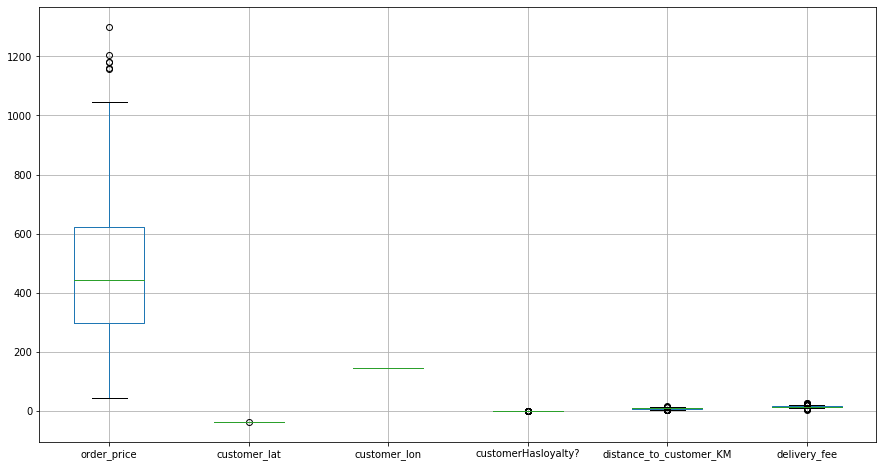

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

bp = outlier_data.boxplot(figsize = (15, 8))

#### Now Investigating delivery fee for outliers

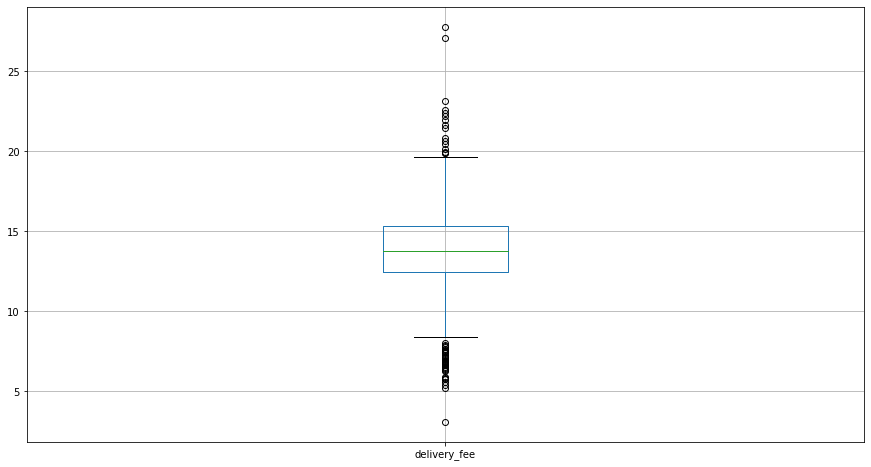

In [73]:
bp = outlier_data.boxplot(column='delivery_fee', figsize=(15,8))

#### There are many extreme values for delivery_fee as seen in the graph

In [74]:
outlier_data['delivery_fee'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0     3.080180
0.1    10.628579
0.2    12.055422
0.3    12.795482
0.4    13.232421
0.5    13.780467
0.6    14.388971
0.7    14.972317
0.8    15.720877
0.9    17.074694
1.0    27.790624
Name: delivery_fee, dtype: float64

#### Finding outliers using Interquartile Range

In [75]:
q1 = outlier_data['delivery_fee'].quantile(0.25)
q3 = outlier_data['delivery_fee'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
data_without_outlier = outlier_data.loc[(outlier_data['delivery_fee'] > fence_low) & (outlier_data['delivery_fee'] < fence_high)]
data_without_outlier

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDB06939,2018-08-05,15:05:54,Lunch,TP,"[('Steak', 1), ('Burger', 9), ('Salad', 2), ('...",678.40,-37.811310,144.947670,0,10.443,14.603443
1,ORDJ06566,2018-02-15,09:31:16,Breakfast,TP,"[('Cereal', 9), ('Coffee', 2), ('Eggs', 1), ('...",395.75,-37.811221,145.007362,0,11.672,14.002851
2,ORDX02967,2018-08-31,15:56:37,Lunch,BK,"[('Fries', 9), ('Burger', 3), ('Steak', 9), ('...",674.80,-37.804416,144.959296,0,7.884,14.318144
3,ORDI08364,2018-08-11,15:16:03,Lunch,NS,"[('Salad', 1), ('Fries', 4), ('Burger', 6), ('...",597.20,-37.818087,144.952316,0,10.027,17.463352
4,ORDI02614,2018-11-27,18:59:09,Dinner,NS,"[('Salmon', 3), ('Fish&Chips', 10)]",473.00,-37.826125,144.966875,0,9.460,15.008391
...,...,...,...,...,...,...,...,...,...,...,...,...
492,ORDX05182,2018-08-01,14:55:46,Lunch,BK,"[('Fries', 10), ('Salad', 6), ('Chicken', 1), ...",528.20,-37.805491,144.973646,0,6.769,12.397305
493,ORDB04988,2018-12-24,19:49:51,Dinner,TP,"[('Pasta', 10), ('Shrimp', 4), ('Fish&Chips', ...",1023.00,-37.801911,144.957864,0,9.497,13.294063
494,ORDK10673,2018-07-05,14:05:04,Lunch,BK,"[('Chicken', 5), ('Salad', 6), ('Steak', 7), (...",893.20,-37.800324,144.960404,0,8.258,13.773427
495,ORDZ09855,2018-01-05,08:00:00,Breakfast,NS,"[('Cereal', 2), ('Pancake', 1), ('Eggs', 6)]",198.25,-37.812418,144.936911,1,10.138,10.951699


#### There are total 445 dataset without outliers

In [76]:
data_without_outlier.shape

(445, 12)

#### Displaying data below with only outliers values

In [77]:
data_only_outlier = outlier_data.loc[(outlier_data['delivery_fee'] > fence_high) | (outlier_data['delivery_fee'] < fence_low)]
data_only_outlier

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
7,ORDZ10422,2018-01-10,08:10:08,Breakfast,NS,"[('Cereal', 4), ('Eggs', 8), ('Pancake', 5)]",381.25,-37.813954,144.963645,1,7.971,5.777043
8,ORDZ01820,2018-10-20,17:38:01,Dinner,NS,"[('Fish&Chips', 6), ('Salmon', 9)]",579.00,-37.822471,144.947401,0,10.006,27.096514
10,ORDJ06997,2018-04-04,11:02:32,Breakfast,TP,"[('Cereal', 1), ('Eggs', 4), ('Coffee', 8)]",169.00,-37.799012,144.988511,0,11.177,6.921187
27,ORDY04830,2018-03-18,10:32:06,Breakfast,TP,"[('Cereal', 9), ('Eggs', 8)]",365.00,-37.813453,144.973828,0,8.601,6.373714
29,ORDZ09868,2018-07-16,14:25:21,Lunch,NS,"[('Salad', 5), ('Chicken', 7), ('Fries', 6), (...",427.00,-37.821889,144.954084,0,9.588,22.611795
38,ORDA06360,2018-01-17,08:30:25,Breakfast,BK,"[('Cereal', 10), ('Pancake', 1), ('Coffee', 2)...",359.25,-37.806532,144.957110,1,8.001,6.696215
43,ORDX03562,2018-01-15,08:20:16,Breakfast,BK,"[('Cereal', 5), ('Pancake', 4), ('Coffee', 2),...",393.00,-37.807162,144.955966,1,8.234,6.860206
54,ORDI00907,2018-03-10,10:11:49,Breakfast,NS,"[('Pancake', 8), ('Eggs', 10), ('Coffee', 4)]",444.00,-37.804612,144.963223,0,7.111,21.985400
57,ORDC01694,2018-12-09,19:19:26,Dinner,NS,"[('Fish&Chips', 4), ('Shrimp', 4), ('Pasta', 9)]",603.50,-37.801121,144.976238,0,6.669,22.234221
63,ORDB04124,2018-06-12,13:14:21,Lunch,TP,"[('Fries', 3), ('Chicken', 1), ('Salad', 9), (...",720.80,-37.802922,144.945531,0,10.199,6.483729


#### There are 55 outlier values

In [78]:
data_only_outlier.shape

(55, 12)

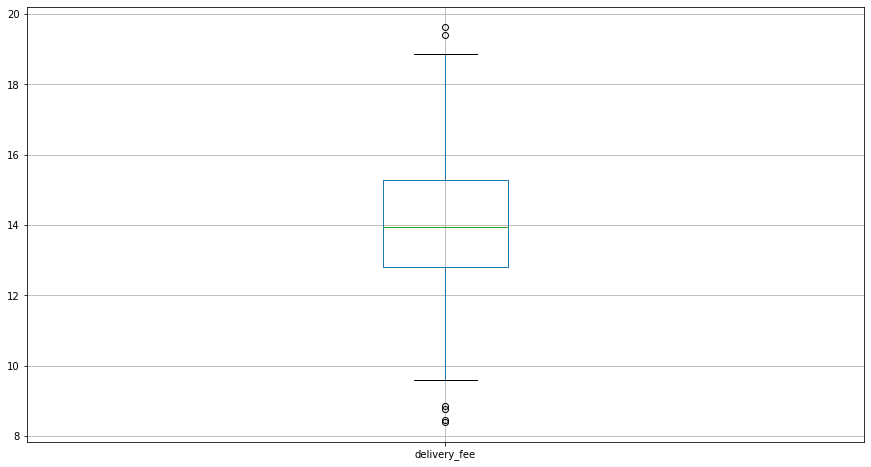

In [79]:
bp = data_without_outlier.boxplot(column='delivery_fee', figsize=(15,8))

#### The above graph shows data without outliers.

### Now finding outliers using Linear Regression

#### Now investigating the delivery fee

In [80]:
corr = outlier_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
order_price,1,0.00214317,0.00952736,-0.135037,0.0334391,0.169817
customer_lat,0.00214317,1,-0.153673,0.0335068,-0.0308614,-0.031938
customer_lon,0.00952736,-0.153673,1,-0.113298,-0.298954,-0.115255
customerHasloyalty?,-0.135037,0.0335068,-0.113298,1,0.0400898,-0.461417
distance_to_customer_KM,0.0334391,-0.0308614,-0.298954,0.0400898,1,0.303787
delivery_fee,0.169817,-0.031938,-0.115255,-0.461417,0.303787,1


#### The above image shows that the 'distance_to_customer_KM' column affects delivery_fee column as the largest values are from the 'distance_to_customer_KM'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a253e7f50>,
      dtype=object)

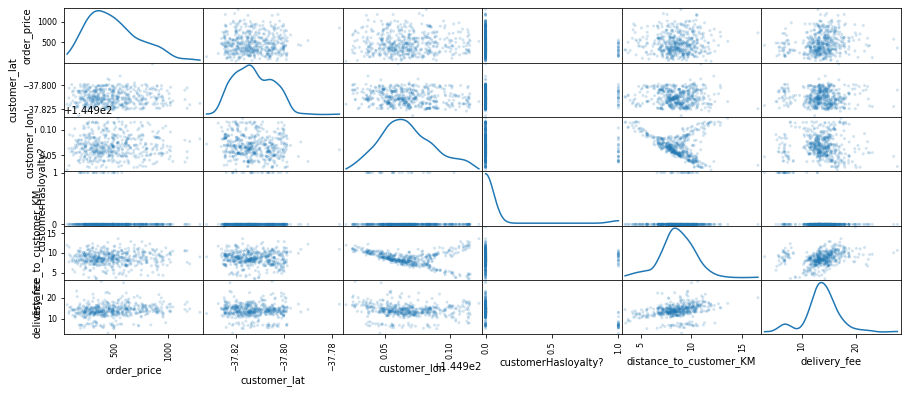

In [81]:
scatter_matrix(outlier_data, alpha = 0.2, figsize = (15, 6), diagonal = 'kde')

#### The above scatter matrix shows the interdependence of various columns on eachother.

#### Defining outlier data to new dataframe.

In [82]:
outlier_df_initial = outlier_data

#### Finding if the order is on weekday or weekend and putting 0 if weekday and 1 if weekend in the new column = week

In [83]:
for i, j in outlier_df_initial['date'].iteritems():
    time_converted = get_weekday(j)
    if time_converted <= 5:
        outlier_df_initial.loc[i, 'week'] = '0'
    else:
        outlier_df_initial.loc[i, 'week'] = '1'

#### Now finding time of day and putting 0 if breakfast, 1 if lunch and 2 if dinner in the new column = time_day

In [84]:
for i, j in outlier_df_initial['order_type'].iteritems():
    if j =='Breakfast':
        outlier_df_initial.loc[i, 'time_day'] = '0'
    elif j =='Lunch':
        outlier_df_initial.loc[i, 'time_day'] = '1'
    elif j =='Dinner':
        outlier_df_initial.loc[i, 'time_day'] = '2'   

#### Now finding data w.r.t branch_code and dividing it into three dataframes.

In [85]:
outlier_df_NS = get_branch(outlier_df_initial, 'NS')
outlier_df_BK = get_branch(outlier_df_initial, 'BK')
outlier_df_TP = get_branch(outlier_df_initial, 'TP')

#### The below code is used to train the data and test the dataset using column week, time_day, customerHasloyalty? and distance_to_customer_KM.
#### These are the most relevant columns for calculating delivery fee.

#### Training and testing 'TP' dataset.

In [86]:
X_train_OUT_TP= missing_df_train_TP[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_train_OUT_TP= missing_df_train_TP['delivery_fee']
X_test_OUT_TP= outlier_df_TP[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_test_OUT_TP= outlier_df_TP['delivery_fee']

#### Fitting the trained model for 'NS' dataset.

In [87]:
regression.fit(X_train_OUT_TP, y_train_OUT_TP)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting the values from the trained model.

In [88]:
predicted_value_OUT_TP = regression.predict(X_test_OUT_TP)
predicted_value_OUT_TP

array([15.04914429, 14.09007277, 11.69297099, 13.71109948, 13.38702101,
       15.57016013, 14.00026871, 13.08560214, 12.32783306, 11.98389998,
       12.17376943, 12.73071755, 12.91982591, 12.40209652, 12.84096432,
       12.97035117, 15.71828097, 12.75121131, 11.8414979 , 12.0154672 ,
       11.21293815, 13.70762648, 13.08024292, 13.4704717 , 11.35763704,
       13.68141848, 14.61639678, 13.76216629, 12.71387429, 12.18543098,
       13.25821775, 14.06021427, 12.18849339, 13.42894713, 12.61322533,
       13.86493455,  5.34063079, 13.47623698, 11.68761177, 14.50691561,
       11.41888525, 13.68448089, 14.4956136 , 12.92441501, 12.26122564,
       14.25368317, 13.19985444, 11.37754271, 11.9900248 , 13.45497762,
       13.71699574, 14.01003951, 11.75115679, 12.5990339 , 13.77788441,
       13.72735464, 12.94891429, 13.02011534, 14.82999991, 11.77565607,
       12.20362793, 15.01568633, 12.44267346, 14.60797516, 14.35149828,
       12.58966916, 13.84831985, 15.14349092, 15.25626306, 14.33

#### The prediction accuracy for the above data NS data is approximately: 92%

In [89]:
regression.score(X_train_OUT_TP, y_train_OUT_TP)*100

91.60957426013859

#### Similarly, training and testing the 'BK' dataset.

In [90]:
X_train_OUT_BK= missing_df_train_BK[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_train_OUT_BK= missing_df_train_BK['delivery_fee']
X_test_OUT_BK= outlier_df_BK[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_test_OUT_BK= outlier_df_BK['delivery_fee']

#### Fitting the data for branch_code = 'BK'

In [91]:
regression.fit(X_train_OUT_BK, y_train_OUT_BK)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting the values from trained model.

In [92]:
predicted_value_OUT_BK = regression.predict(X_test_OUT_BK)
predicted_value_OUT_BK

array([14.17015872, 10.3162249 , 12.94660617, 11.68585203, 15.13781562,
       14.6175016 , 14.88350733, 17.3272452 , 14.87439185, 13.43293052,
       14.08486017,  6.78540504, 13.19105932,  7.02777775, 17.90198878,
       16.78790653, 13.00510539, 15.14172998, 14.52804214, 12.52531456,
       18.17324126, 14.08357339, 14.84139678, 14.14964636, 14.82574777,
       12.35575769, 15.21662626, 13.07896144,  9.18930917, 13.76838486,
       14.02140637, 12.63478486, 14.6175016 , 14.31499671, 14.49678974,
       13.29636872, 16.54915601, 15.3354586 , 13.19026565, 17.07447023,
       13.36190297, 14.48331242, 13.13567238, 11.13061779, 12.9780595 ,
       14.38157118, 16.39128818, 15.16590173, 12.85402604, 10.3878963 ,
       11.35010552,  9.86753665, 18.30738482, 16.02176133, 17.82268503,
       17.46376138, 16.57956912, 14.62265711, 11.48766193, 16.67814406,
       13.82688407, 18.51260155, 13.33461054, 16.45632933, 13.09743896,
       14.52383562, 15.13781562, 12.00544802, 15.81009391, 15.05

#### The prediction accuracy for the above data NS data is approximately: 94%

In [93]:
regression.score(X_train_OUT_BK, y_train_OUT_BK)*100

94.04349488726935

#### Similarly, training and testing the 'NS' dataset.

In [94]:
X_train_OUT_NS= missing_df_train_NS[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_train_OUT_NS= missing_df_train_NS['delivery_fee']
X_test_OUT_NS= outlier_df_NS[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_test_OUT_NS= outlier_df_NS['delivery_fee']

#### Fitting the data for branch_code = 'NS'

In [95]:
regression.fit(X_train_OUT_NS, y_train_OUT_NS)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting the values from the trained model

In [96]:
predicted_value_OUT_NS = regression.predict(X_test_OUT_NS)
predicted_value_OUT_NS

array([15.92433571, 15.86731886,  6.41186386, 16.4239699 , 13.59060772,
       15.58389581, 13.19401935, 15.48092556, 15.47677196, 12.88110615,
       12.19898013, 12.11137807, 15.36972369, 14.77092443, 12.43040831,
       17.73709542, 14.47832581, 13.11041974, 15.66741984, 14.27477275,
       14.29523847,  8.13992889, 15.39936497, 13.78839216, 17.60005743,
       16.49627935, 16.49416477, 14.93431846, 13.33267235, 12.8474624 ,
       14.54188369, 15.91829423, 17.53523295, 13.5641761 , 13.19009246,
       16.0058963 , 14.12600024, 14.61113462, 15.09853472, 15.94989896,
       15.83877266, 12.98298132, 15.97829403, 14.8976162 , 14.23697541,
       12.80872112, 16.48506477, 14.30841649, 14.2359559 , 13.52841777,
       15.88567   , 13.86995275, 13.42850605, 13.11959531, 15.00889364,
       13.51320073,  7.53841953, 13.52637876, 15.98965975,  9.99704736,
       13.17464871, 14.28802635, 16.37095551, 15.5226498 , 14.49694979,
       16.48200625, 18.39119517, 15.72356832, 14.58360792, 13.69

#### The prediction accuracy for the above TP data is approximately: 94%

In [97]:
regression.score(X_train_OUT_NS, y_train_OUT_NS)*100

89.92411912883617

#### Assigning the predicted values to outlier dataframe.

In [98]:
outlier_df_NS['predicted_delivery_fee'] = predicted_value_OUT_NS
outlier_df_BK['predicted_delivery_fee'] = predicted_value_OUT_BK
outlier_df_TP['predicted_delivery_fee'] = predicted_value_OUT_TP

/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to 

#### Now Finding residual values from predicted delivery fee and delivery fee.

In [99]:
outlier_df_NS['residual_value'] = outlier_df_NS['delivery_fee'] - outlier_df_NS['predicted_delivery_fee']
outlier_df_TP['residual_value'] = outlier_df_TP['delivery_fee'] - outlier_df_TP['predicted_delivery_fee']
outlier_df_BK['residual_value'] = outlier_df_BK['delivery_fee'] - outlier_df_BK['predicted_delivery_fee']

/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to 

#### Concatening three dataframe to one and deleting the row that are not necessary

In [100]:
outlier_df_merged = pd.concat([outlier_df_NS,  outlier_df_TP, outlier_df_BK])
del outlier_df_merged['week']
del outlier_df_merged['time_day']
outlier_df_merged = outlier_df_merged.sort_index()
outlier_df_merged

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,predicted_delivery_fee,residual_value
0,ORDB06939,2018-08-05,15:05:54,Lunch,TP,"[('Steak', 1), ('Burger', 9), ('Salad', 2), ('...",678.40,-37.811310,144.947670,0,10.443,14.603443,15.049144,-0.445701
1,ORDJ06566,2018-02-15,09:31:16,Breakfast,TP,"[('Cereal', 9), ('Coffee', 2), ('Eggs', 1), ('...",395.75,-37.811221,145.007362,0,11.672,14.002851,14.090073,-0.087222
2,ORDX02967,2018-08-31,15:56:37,Lunch,BK,"[('Fries', 9), ('Burger', 3), ('Steak', 9), ('...",674.80,-37.804416,144.959296,0,7.884,14.318144,14.170159,0.147985
3,ORDI08364,2018-08-11,15:16:03,Lunch,NS,"[('Salad', 1), ('Fries', 4), ('Burger', 6), ('...",597.20,-37.818087,144.952316,0,10.027,17.463352,15.924336,1.539017
4,ORDI02614,2018-11-27,18:59:09,Dinner,NS,"[('Salmon', 3), ('Fish&Chips', 10)]",473.00,-37.826125,144.966875,0,9.460,15.008391,15.867319,-0.858928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDZ09855,2018-01-05,08:00:00,Breakfast,NS,"[('Cereal', 2), ('Pancake', 1), ('Eggs', 6)]",198.25,-37.812418,144.936911,1,10.138,10.951699,8.621136,2.330562
496,ORDA04575,2018-01-17,08:30:25,Breakfast,BK,"[('Cereal', 5), ('Coffee', 7)]",157.50,-37.806415,144.956074,1,8.094,6.875173,6.882146,-0.006974
497,ORDJ07849,2018-09-11,16:27:02,Dinner,TP,"[('Fish&Chips', 3), ('Pasta', 3), ('Salmon', 3)]",310.50,-37.807941,144.969917,0,9.178,13.007499,13.618817,-0.611317
498,ORDB06432,2018-01-11,08:10:08,Breakfast,TP,"[('Eggs', 7), ('Coffee', 8), ('Cereal', 6), ('...",485.50,-37.806411,144.957069,1,9.323,5.614385,5.558062,0.056323


#### Now finding list of z-values which are not outliers

In [101]:
elements = np.array(outlier_df_merged['residual_value'])

mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)

final_list = [x for x in outlier_df_merged['residual_value'] if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
print(final_list)

[-0.4457009860004426, -0.08722197151396216, 0.14798488390977127, 1.5390167931793357, -0.858928163152898, -0.17555248895938114, -1.8544795971481882, -0.6348204635467578, -0.6639489667865508, -0.13849211230961522, 1.4842687682489295, 0.17982229435719788, 0.1266434572664945, -0.6296717264911358, -0.01756132305671798, 1.3691525785873253, 1.2195638359968246, -0.2378396087891197, -0.4108364820512804, 0.410799504208347, 0.16660477048237432, 0.15022406982558323, -0.8587373467813464, -0.4480578977705747, -0.5176084471868485, -0.14845156241954705, -0.26606364561167695, -0.68412181750295, -0.5614700235164118, -0.4411481651809659, -1.3115007482743444, 0.4852701809639779, 0.14525412988818331, 2.2244639313555012, -0.0891902433508438, -0.34995860921323185, -0.48251353433873057, -0.05840626897703416, -0.5533064210517491, -0.16757184523931823, -0.43098939595892993, 0.8246389239691396, -0.41798508677067936, -0.7914558977360819, 0.23032777263706272, -0.4880161503577458, 1.097633771705432, -0.658124081884

#### These are the values which are not outliers values.

In [102]:
print(len(final_list))

463


#### So total there are 463 non outlier values in the dataset for the delivery_fee

In [103]:
outlier_test = outlier_df_merged

In [104]:
outlier_test['residual_value'] = outlier_test['residual_value'].apply(lambda x: x if x in final_list else 'NaN')
outlier_values = outlier_test[outlier_test['residual_value']=='NaN']
outlier_values

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,predicted_delivery_fee,residual_value
8,ORDZ01820,2018-10-20,17:38:01,Dinner,NS,"[('Fish&Chips', 6), ('Salmon', 9)]",579.00,-37.822471,144.947401,0,10.006,27.096514,16.423970,NaN
10,ORDJ06997,2018-04-04,11:02:32,Breakfast,TP,"[('Cereal', 1), ('Eggs', 4), ('Coffee', 8)]",169.00,-37.799012,144.988511,0,11.177,6.921187,13.711099,NaN
27,ORDY04830,2018-03-18,10:32:06,Breakfast,TP,"[('Cereal', 9), ('Eggs', 8)]",365.00,-37.813453,144.973828,0,8.601,6.373714,12.919826,NaN
29,ORDZ09868,2018-07-16,14:25:21,Lunch,NS,"[('Salad', 5), ('Chicken', 7), ('Fries', 6), (...",427.00,-37.821889,144.954084,0,9.588,22.611795,15.476772,NaN
54,ORDI00907,2018-03-10,10:11:49,Breakfast,NS,"[('Pancake', 8), ('Eggs', 10), ('Coffee', 4)]",444.00,-37.804612,144.963223,0,7.111,21.985400,12.430408,NaN
57,ORDC01694,2018-12-09,19:19:26,Dinner,NS,"[('Fish&Chips', 4), ('Shrimp', 4), ('Pasta', 9)]",603.50,-37.801121,144.976238,0,6.669,22.234221,14.478326,NaN
63,ORDB04124,2018-06-12,13:14:21,Lunch,TP,"[('Fries', 3), ('Chicken', 1), ('Salad', 9), (...",720.80,-37.802922,144.945531,0,10.199,6.483729,13.681418,NaN
71,ORDZ01558,2018-01-06,08:10:08,Breakfast,NS,"[('Pancake', 6), ('Eggs', 3)]",211.50,-37.809473,145.003438,1,9.666,12.924880,8.139929,NaN
91,ORDK09590,2018-01-19,08:30:25,Breakfast,BK,"[('Coffee', 7), ('Eggs', 10), ('Pancake', 2)]",321.00,-37.806120,144.956154,0,8.358,6.653379,13.768385,NaN
92,ORDB08727,2018-10-14,17:27:53,Dinner,TP,"[('Pasta', 1), ('Salmon', 3), ('Fish&Chips', 1)]",185.50,-37.814949,144.964513,0,7.957,6.754654,13.864935,NaN


#### These are the outlier values in the delivery_fee.

#### The below code will display the dataset without outliers.

In [105]:
outlier_test['residual_value'] = outlier_test['residual_value'].apply(lambda x: x if x in final_list else 'NaN')
non_outlier_values = outlier_test[outlier_test['residual_value']!='NaN']
non_outlier_values.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,predicted_delivery_fee,residual_value
0,ORDB06939,2018-08-05,15:05:54,Lunch,TP,"[('Steak', 1), ('Burger', 9), ('Salad', 2), ('...",678.40,-37.811310,144.947670,0,10.443,14.603443,15.049144,-0.445701
1,ORDJ06566,2018-02-15,09:31:16,Breakfast,TP,"[('Cereal', 9), ('Coffee', 2), ('Eggs', 1), ('...",395.75,-37.811221,145.007362,0,11.672,14.002851,14.090073,-0.087222
2,ORDX02967,2018-08-31,15:56:37,Lunch,BK,"[('Fries', 9), ('Burger', 3), ('Steak', 9), ('...",674.80,-37.804416,144.959296,0,7.884,14.318144,14.170159,0.147985
3,ORDI08364,2018-08-11,15:16:03,Lunch,NS,"[('Salad', 1), ('Fries', 4), ('Burger', 6), ('...",597.20,-37.818087,144.952316,0,10.027,17.463352,15.924336,1.53902
4,ORDI02614,2018-11-27,18:59:09,Dinner,NS,"[('Salmon', 3), ('Fish&Chips', 10)]",473.00,-37.826125,144.966875,0,9.460,15.008391,15.867319,-0.858928
5,ORDY10750,2018-04-25,11:43:05,Breakfast,TP,"[('Pancake', 8), ('Cereal', 8)]",362.00,-37.818640,144.953463,0,8.541,11.517418,11.692971,-0.175552
6,ORDA04763,2018-01-14,08:20:16,Breakfast,BK,"[('Eggs', 6), ('Coffee', 6), ('Pancake', 5)]",298.25,-37.810942,144.939119,1,9.803,8.461745,10.316225,-1.85448
7,ORDZ10422,2018-01-10,08:10:08,Breakfast,NS,"[('Cereal', 4), ('Eggs', 8), ('Pancake', 5)]",381.25,-37.813954,144.963645,1,7.971,5.777043,6.411864,-0.63482
9,ORDX07121,2018-03-09,10:11:49,Breakfast,BK,"[('Pancake', 5), ('Eggs', 2), ('Cereal', 10), ...",390.25,-37.815796,144.966498,0,7.568,12.282657,12.946606,-0.663949
11,ORDB06839,2018-08-19,15:36:20,Lunch,TP,"[('Chicken', 4), ('Salad', 8), ('Fries', 9)]",373.60,-37.816226,144.956720,0,8.272,13.248529,13.387021,-0.138492


In [106]:
del non_outlier_values['predicted_delivery_fee']
del non_outlier_values['residual_value']
non_outlier_values

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDB06939,2018-08-05,15:05:54,Lunch,TP,"[('Steak', 1), ('Burger', 9), ('Salad', 2), ('...",678.40,-37.811310,144.947670,0,10.443,14.603443
1,ORDJ06566,2018-02-15,09:31:16,Breakfast,TP,"[('Cereal', 9), ('Coffee', 2), ('Eggs', 1), ('...",395.75,-37.811221,145.007362,0,11.672,14.002851
2,ORDX02967,2018-08-31,15:56:37,Lunch,BK,"[('Fries', 9), ('Burger', 3), ('Steak', 9), ('...",674.80,-37.804416,144.959296,0,7.884,14.318144
3,ORDI08364,2018-08-11,15:16:03,Lunch,NS,"[('Salad', 1), ('Fries', 4), ('Burger', 6), ('...",597.20,-37.818087,144.952316,0,10.027,17.463352
4,ORDI02614,2018-11-27,18:59:09,Dinner,NS,"[('Salmon', 3), ('Fish&Chips', 10)]",473.00,-37.826125,144.966875,0,9.460,15.008391
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDZ09855,2018-01-05,08:00:00,Breakfast,NS,"[('Cereal', 2), ('Pancake', 1), ('Eggs', 6)]",198.25,-37.812418,144.936911,1,10.138,10.951699
496,ORDA04575,2018-01-17,08:30:25,Breakfast,BK,"[('Cereal', 5), ('Coffee', 7)]",157.50,-37.806415,144.956074,1,8.094,6.875173
497,ORDJ07849,2018-09-11,16:27:02,Dinner,TP,"[('Fish&Chips', 3), ('Pasta', 3), ('Salmon', 3)]",310.50,-37.807941,144.969917,0,9.178,13.007499
498,ORDB06432,2018-01-11,08:10:08,Breakfast,TP,"[('Eggs', 7), ('Coffee', 8), ('Cereal', 6), ('...",485.50,-37.806411,144.957069,1,9.323,5.614385


#### We can see that the <u><i>eight</i></u> row had a the outlier value and now it is deleted.

#### Writing the data to csv file:

In [107]:
outlier_data_solution_csv = non_outlier_values.to_csv('Group145_outlier_data_solution.csv')

 #### The outliers in the above code has been removed using Interquartile Range and Linear Regression.

## 2.3. Looking dataset information

In [108]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


#### From the above output, there are no null values in the dataset

In [109]:
dirty_data[dirty_data.duplicated()]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee


#### From the above output, there are no duplicate values in the dataset

## Analysing Column data

### 2.3.1. Analysing <u><i>order_id</i></u> column in dirty_data

In [110]:
dirty_data['order_id'].head(5)

0    ORDX00699
1    ORDX06260
2    ORDI04941
3    ORDI03372
4    ORDK03173
Name: order_id, dtype: object

In [111]:
dirty_data['order_id'].str[:4].unique()

array(['ORDX', 'ORDI', 'ORDK', 'ORDB', 'ORDY', 'ORDJ', 'ORDC', 'ORDZ',
       'ORDA'], dtype=object)

#### There are total 9 unique order_id's and by seeing, the starting four characters are not digit, Hence the order_id's doesn't seems to be incorrect.

### 2.3.2. Analysing <u><i>date</i></u> column in dirty_data

In [112]:
dirty_data[['order_id','date']].head()

,order_id,date
0,ORDX00699,03-08-2018
1,ORDX06260,2018-03-14
2,ORDI04941,2018-04-22
3,ORDI03372,2018-12-08
4,ORDK03173,2018-11-04


#### Date column has format mismatch.. Correcting it from the below code and assigning it to the dataframe..

In [113]:
dirty_data['date'] = pd.to_datetime(dirty_data['date'], dayfirst = True)

In [114]:
dirty_data['date'].head()

0   2018-08-03
1   2018-03-14
2   2018-04-22
3   2018-12-08
4   2018-11-04
Name: date, dtype: datetime64[ns]

#### Now the date format has been corrected.

### 2.3.3. Analysing <u><i>time</i></u> format column in dirty_data

In [115]:
dirty_data[['order_id','date', 'time']].head()

,order_id,date,time
0,ORDX00699,2018-08-03,15:05:54
1,ORDX06260,2018-03-14,10:21:58
2,ORDI04941,2018-04-22,11:43:05
3,ORDI03372,2018-12-08,19:19:26
4,ORDK03173,2018-11-04,18:08:27


#### Checking the format of time
The method is_time is called which returns True if the time given is in proper time format and False if not.

In [116]:
count = 0
for i in dirty_data['time']:
    if is_time(i):
        count += 1
        print('The time %s is in proper time format' %i)
    else:
        print('The time %s is not in a proper time format' %i)

The time 15:05:54 is in proper time format
The time 10:21:58 is in proper time format
The time 11:43:05 is in proper time format
The time 19:19:26 is in proper time format
The time 18:08:27 is in proper time format
The time 09:51:32 is in proper time format
The time 08:40:33 is in proper time format
The time 14:25:21 is in proper time format
The time 14:25:21 is in proper time format
The time 12:33:48 is in proper time format
The time 15:46:28 is in proper time format
The time 08:10:08 is in proper time format
The time 13:24:30 is in proper time format
The time 19:09:17 is in proper time format
The time 13:44:47 is in proper time format
The time 13:04:13 is in proper time format
The time 16:37:10 is in proper time format
The time 16:27:02 is in proper time format
The time 08:00:00 is in proper time format
The time 15:26:11 is in proper time format
The time 14:15:12 is in proper time format
The time 18:49:00 is in proper time format
The time 18:18:35 is in proper time format
The time 18

The time 11:43:05 is in proper time format
The time 10:11:49 is in proper time format
The time 09:00:50 is in proper time format
The time 16:37:10 is in proper time format
The time 17:38:01 is in proper time format
The time 17:38:01 is in proper time format
The time 18:28:43 is in proper time format
The time 17:38:01 is in proper time format
The time 16:06:45 is in proper time format
The time 12:23:39 is in proper time format
The time 12:33:48 is in proper time format
The time 10:32:06 is in proper time format
The time 17:17:44 is in proper time format
The time 11:53:14 is in proper time format
The time 13:34:38 is in proper time format
The time 12:03:22 is in proper time format
The time 11:22:49 is in proper time format
The time 16:57:27 is in proper time format
The time 14:45:38 is in proper time format
The time 11:43:05 is in proper time format
The time 20:00:00 is in proper time format
The time 11:02:32 is in proper time format
The time 16:27:02 is in proper time format
The time 18

### 2.3.4. Analysing <u><i>order_type</i></u> column in dirty_data

In [117]:
dirty_data['order_type'].unique()

array(['Lunch', 'Breakfast', 'Dinner'], dtype=object)

#### There are three types of order_type which has no ambiguity.

#### Saving them into an array to use it later on to check whether time is correct or not according to breakfast time, lunch time or dinner time.

In [118]:
order_category = ['Breakfast', 'Lunch', 'Dinner']

#### Categorizing data w.r.t time.
My assumption for this task is that the breakfast time starts at 07 AM and ends at 12 Noon.
Lunch time starts at 12 Noon and ends at 04 PM.
Dinner time starts at 04 PM till latenight.

In [119]:
breakfast_time = '07:00:00'
lunch_time = '12:00:00'
dinner_time = '16:00:00'

for index, i in dirty_data['time'].iteritems() :
    true_time = convert_time(i)
    
    # Comparing corresponding time w.r.t breakfast, lunch or dinner time and correcting order_type.
    if convert_time(breakfast_time) <= true_time < convert_time(lunch_time):
        dirty_data['order_type'][index] = order_category[0]
            
    if convert_time(lunch_time) <= true_time < convert_time(dinner_time):
        dirty_data['order_type'][index] = order_category[1]
            
    if convert_time(dinner_time) <= true_time < convert_time(breakfast_time):
        dirty_data['order_type'][index] = order_category[2]

/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [120]:
dirty_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX00699,2018-08-03,15:05:54,Lunch,BK,"[('Chicken', 2), ('Steak', 1)]",109.00,-37.812276,144.973739,0,6.776,12.633699
1,ORDX06260,2018-03-14,10:21:58,Breakfast,BK,"[('Cereal', 6), ('Pancake', 8), ('Coffee', 7),...",548.50,-37.817459,144.977806,0,6.833,11.839359
2,ORDI04941,2018-04-22,11:43:05,Breakfast,NS,"[('Cereal', 5), ('Pancake', 6), ('Coffee', 8),...",464.50,-37.819080,144.953533,0,9.226,16.365409
3,ORDI03372,2018-12-08,19:19:26,Dinner,NS,"[('Fish&Chips', 7), ('Shrimp', 3)]",407.00,-37.812623,144.947191,0,10.071,17.962534
4,ORDK03173,2018-11-04,18:08:27,Dinner,tp,"[('Fish&Chips', 7), ('Pasta', 6)]",410.00,-37.819301,144.961111,0,8.016,17.595995
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDX01661,2018-04-01,10:52:23,Breakfast,bk,"[('Coffee', 10), ('Eggs', 8)]",251.00,-37.820035,144.980254,0,7.132,14.048460
496,ORDZ10029,2018-07-13,14:25:21,Lunch,NS,"[('Steak', 8), ('Chicken', 3), ('Salad', 1), (...",274.75,-37.816459,145.004164,0,10.313,16.180607
497,ORDY02674,2018-07-24,14:45:38,Lunch,TP,"[('Salad', 5), ('Chicken', 1), ('Burger', 3), ...",448.00,-37.800264,144.963587,0,9.742,12.836641
498,ORDB09235,2018-09-16,16:37:10,Dinner,TP,"[('Pasta', 1), ('Salmon', 1), ('Fish&Chips', 1...",904.50,-37.805874,144.978373,0,9.671,15.338277


#### The order_type has been corrected.

### 2.3.5. Analysing <u><i>branch_code</i></u> column in dirty_data

In [121]:
dirty_data['branch_code'].unique()

array(['BK', 'NS', 'tp', 'TP', 'ns', 'bk'], dtype=object)

#### In dirty data, branch_code has ambiguities. These are small and capital letters of branch_code. Normalizing it to Capital letters.

#### Getting unique order_id's for branch_code = 'BK'

In [122]:
dirty_bc_bk = get_branch_order(dirty_data, 'BK')

     order_id branch_code
0   ORDX00699          BK
1   ORDX06260          BK
16  ORDK04564          BK
21  ORDI09297          BK
23  ORDX10183          BK

These are the 5 dataset(printed using head(5)) for branch_code = BK

There are total (150,) values of order_id for branch_code = BK. 
Now we'll find how many unique order_id's for branch_code = BK present in the data by analysing first four characters of order_id.

Displaying data: 

There are total 5 unique values of order_id for branch_code = BK : ['ORDX' 'ORDK' 'ORDI' 'ORDA' 'ORDY']

Dictionary key value pair for branch_code = BK : {'ORDX': 'BK', 'ORDK': 'BK', 'ORDI': 'BK', 'ORDA': 'BK', 'ORDY': 'BK'}


#### Getting unique order_id's for branch_code = 'NS'

In [123]:
dirty_bc_ns = get_branch_order(dirty_data, 'NS')

     order_id branch_code
2   ORDI04941          NS
3   ORDI03372          NS
7   ORDI02220          NS
10  ORDC01147          NS
13  ORDZ10209          NS

These are the 5 dataset(printed using head(5)) for branch_code = NS

There are total (134,) values of order_id for branch_code = NS. 
Now we'll find how many unique order_id's for branch_code = NS present in the data by analysing first four characters of order_id.

Displaying data: 

There are total 6 unique values of order_id for branch_code = NS : ['ORDI' 'ORDC' 'ORDZ' 'ORDK' 'ORDB' 'ORDX']

Dictionary key value pair for branch_code = NS : {'ORDI': 'NS', 'ORDC': 'NS', 'ORDZ': 'NS', 'ORDK': 'NS', 'ORDB': 'NS', 'ORDX': 'NS'}


#### Getting unique order_id's for branch_code = 'TP'

In [124]:
dirty_bc_tp = get_branch_order(dirty_data, 'TP')

     order_id branch_code
5   ORDB02744          TP
6   ORDB07772          TP
8   ORDY07813          TP
9   ORDJ02557          TP
11  ORDY09876          TP

These are the 5 dataset(printed using head(5)) for branch_code = TP

There are total (188,) values of order_id for branch_code = TP. 
Now we'll find how many unique order_id's for branch_code = TP present in the data by analysing first four characters of order_id.

Displaying data: 

There are total 5 unique values of order_id for branch_code = TP : ['ORDB' 'ORDY' 'ORDJ' 'ORDC' 'ORDI']

Dictionary key value pair for branch_code = TP : {'ORDB': 'TP', 'ORDY': 'TP', 'ORDJ': 'TP', 'ORDC': 'TP', 'ORDI': 'TP'}


#### By seeing the above data, we can imply that there are ambiguities in branch_code data as all three branch_code's are repeating in each group. <br>
#### If we want to correct this data, then first we can analyse missing data's order_id and branch_code combination, and then we can correct the dirty data with correct values.

#### Analysing missing data for order_id and branch_code

In [125]:
bk_dict = get_branch_order(missing_data, 'BK')

     order_id branch_code
0   ORDX00188          BK
2   ORDK05872          BK
4   ORDK01479          BK
6   ORDK09642          BK
11  ORDX05025          BK

These are the 5 dataset(printed using head(5)) for branch_code = BK

There are total (166,) values of order_id for branch_code = BK. 
Now we'll find how many unique order_id's for branch_code = BK present in the data by analysing first four characters of order_id.

Displaying data: 

There are total 3 unique values of order_id for branch_code = BK : ['ORDX' 'ORDK' 'ORDA']

Dictionary key value pair for branch_code = BK : {'ORDX': 'BK', 'ORDK': 'BK', 'ORDA': 'BK'}


In [126]:
ns_dict = get_branch_order(missing_data, 'NS')

    order_id branch_code
1  ORDZ07051          NS
3  ORDC06592          NS
5  ORDC00169          NS
7  ORDC10700          NS
8  ORDI06174          NS

These are the 5 dataset(printed using head(5)) for branch_code = NS

There are total (141,) values of order_id for branch_code = NS. 
Now we'll find how many unique order_id's for branch_code = NS present in the data by analysing first four characters of order_id.

Displaying data: 

There are total 3 unique values of order_id for branch_code = NS : ['ORDZ' 'ORDC' 'ORDI']

Dictionary key value pair for branch_code = NS : {'ORDZ': 'NS', 'ORDC': 'NS', 'ORDI': 'NS'}


In [127]:
tp_dict = get_branch_order(missing_data, 'TP')

     order_id branch_code
9   ORDJ05186          TP
18  ORDY04131          TP
21  ORDY00181          TP
22  ORDB11026          TP
23  ORDY05307          TP

These are the 5 dataset(printed using head(5)) for branch_code = TP

There are total (193,) values of order_id for branch_code = TP. 
Now we'll find how many unique order_id's for branch_code = TP present in the data by analysing first four characters of order_id.

Displaying data: 

There are total 3 unique values of order_id for branch_code = TP : ['ORDJ' 'ORDY' 'ORDB']

Dictionary key value pair for branch_code = TP : {'ORDJ': 'TP', 'ORDY': 'TP', 'ORDB': 'TP'}


#### From the above analysis, we can imply that, <br>
#### branch_code = 'BK' has order_id prefix = {'ORDK': 'BK', 'ORDX': 'BK', 'ORDA': 'BK'} <br>
#### branch_code = 'NS' has order_id prefix = {'ORDC': 'NS', 'ORDI': 'NS', 'ORDZ': 'NS'} <br>
#### branch_code = 'TP' has order_id prefix = {'ORDY': 'TP', 'ORDB': 'TP', 'ORDJ': 'TP'}

#### Merging all three dictionaries into one

In [128]:
merged_dict = {}
merged_dict.update(bk_dict)
merged_dict.update(ns_dict)
merged_dict.update(tp_dict)
merged_dict

{'ORDX': 'BK',
 'ORDK': 'BK',
 'ORDA': 'BK',
 'ORDZ': 'NS',
 'ORDC': 'NS',
 'ORDI': 'NS',
 'ORDJ': 'TP',
 'ORDY': 'TP',
 'ORDB': 'TP'}

#### Now that we have a correct combination of order_id and branch_code, we can now correct our dirty data from this asumption

In [129]:
for i in dirty_data['order_id'].index:
    print('Old Data - order_id : %s, branch_code : %s' %(dirty_data['order_id'][i], dirty_data['branch_code'][i]))
    for key, value in merged_dict.items():
        if key == dirty_data['order_id'][i][:4]:
            dirty_data.at[i,'branch_code'] =  value
            print('New Data - order_id : %s, branch_code : %s \n' %(dirty_data['order_id'][i], dirty_data['branch_code'][i]))


Old Data - order_id : ORDX00699, branch_code : BK
New Data - order_id : ORDX00699, branch_code : BK 

Old Data - order_id : ORDX06260, branch_code : BK
New Data - order_id : ORDX06260, branch_code : BK 

Old Data - order_id : ORDI04941, branch_code : NS
New Data - order_id : ORDI04941, branch_code : NS 

Old Data - order_id : ORDI03372, branch_code : NS
New Data - order_id : ORDI03372, branch_code : NS 

Old Data - order_id : ORDK03173, branch_code : tp
New Data - order_id : ORDK03173, branch_code : BK 

Old Data - order_id : ORDB02744, branch_code : TP
New Data - order_id : ORDB02744, branch_code : TP 

Old Data - order_id : ORDB07772, branch_code : TP
New Data - order_id : ORDB07772, branch_code : TP 

Old Data - order_id : ORDI02220, branch_code : NS
New Data - order_id : ORDI02220, branch_code : NS 

Old Data - order_id : ORDY07813, branch_code : TP
New Data - order_id : ORDY07813, branch_code : TP 

Old Data - order_id : ORDJ02557, branch_code : TP
New Data - order_id : ORDJ02557,

Old Data - order_id : ORDX02213, branch_code : BK
New Data - order_id : ORDX02213, branch_code : BK 

Old Data - order_id : ORDA10279, branch_code : BK
New Data - order_id : ORDA10279, branch_code : BK 

Old Data - order_id : ORDY09682, branch_code : TP
New Data - order_id : ORDY09682, branch_code : TP 

Old Data - order_id : ORDB02292, branch_code : TP
New Data - order_id : ORDB02292, branch_code : TP 

Old Data - order_id : ORDX09640, branch_code : BK
New Data - order_id : ORDX09640, branch_code : BK 

Old Data - order_id : ORDJ10549, branch_code : bk
New Data - order_id : ORDJ10549, branch_code : TP 

Old Data - order_id : ORDA05444, branch_code : BK
New Data - order_id : ORDA05444, branch_code : BK 

Old Data - order_id : ORDB10480, branch_code : TP
New Data - order_id : ORDB10480, branch_code : TP 

Old Data - order_id : ORDZ06907, branch_code : NS
New Data - order_id : ORDZ06907, branch_code : NS 

Old Data - order_id : ORDB08099, branch_code : TP
New Data - order_id : ORDB08099,


Old Data - order_id : ORDJ02804, branch_code : TP
New Data - order_id : ORDJ02804, branch_code : TP 

Old Data - order_id : ORDC05132, branch_code : NS
New Data - order_id : ORDC05132, branch_code : NS 

Old Data - order_id : ORDY02822, branch_code : TP
New Data - order_id : ORDY02822, branch_code : TP 

Old Data - order_id : ORDB06064, branch_code : TP
New Data - order_id : ORDB06064, branch_code : TP 

Old Data - order_id : ORDX08661, branch_code : BK
New Data - order_id : ORDX08661, branch_code : BK 

Old Data - order_id : ORDY09431, branch_code : TP
New Data - order_id : ORDY09431, branch_code : TP 

Old Data - order_id : ORDC06636, branch_code : NS
New Data - order_id : ORDC06636, branch_code : NS 

Old Data - order_id : ORDK06509, branch_code : tp
New Data - order_id : ORDK06509, branch_code : BK 

Old Data - order_id : ORDB05355, branch_code : TP
New Data - order_id : ORDB05355, branch_code : TP 

Old Data - order_id : ORDY02335, branch_code : TP
New Data - order_id : ORDY02335


Old Data - order_id : ORDB08876, branch_code : TP
New Data - order_id : ORDB08876, branch_code : TP 

Old Data - order_id : ORDB03943, branch_code : TP
New Data - order_id : ORDB03943, branch_code : TP 

Old Data - order_id : ORDJ01593, branch_code : TP
New Data - order_id : ORDJ01593, branch_code : TP 

Old Data - order_id : ORDJ10787, branch_code : TP
New Data - order_id : ORDJ10787, branch_code : TP 

Old Data - order_id : ORDZ05307, branch_code : tp
New Data - order_id : ORDZ05307, branch_code : NS 

Old Data - order_id : ORDK06979, branch_code : BK
New Data - order_id : ORDK06979, branch_code : BK 

Old Data - order_id : ORDK03074, branch_code : BK
New Data - order_id : ORDK03074, branch_code : BK 

Old Data - order_id : ORDJ07139, branch_code : TP
New Data - order_id : ORDJ07139, branch_code : TP 

Old Data - order_id : ORDY04193, branch_code : TP
New Data - order_id : ORDY04193, branch_code : TP 

Old Data - order_id : ORDI09114, branch_code : NS
New Data - order_id : ORDI09114

#### The above output shows Incorrect and Corrected data.

In [130]:
dirty_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX00699,2018-08-03,15:05:54,Lunch,BK,"[('Chicken', 2), ('Steak', 1)]",109.00,-37.812276,144.973739,0,6.776,12.633699
1,ORDX06260,2018-03-14,10:21:58,Breakfast,BK,"[('Cereal', 6), ('Pancake', 8), ('Coffee', 7),...",548.50,-37.817459,144.977806,0,6.833,11.839359
2,ORDI04941,2018-04-22,11:43:05,Breakfast,NS,"[('Cereal', 5), ('Pancake', 6), ('Coffee', 8),...",464.50,-37.819080,144.953533,0,9.226,16.365409
3,ORDI03372,2018-12-08,19:19:26,Dinner,NS,"[('Fish&Chips', 7), ('Shrimp', 3)]",407.00,-37.812623,144.947191,0,10.071,17.962534
4,ORDK03173,2018-11-04,18:08:27,Dinner,BK,"[('Fish&Chips', 7), ('Pasta', 6)]",410.00,-37.819301,144.961111,0,8.016,17.595995
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDX01661,2018-04-01,10:52:23,Breakfast,BK,"[('Coffee', 10), ('Eggs', 8)]",251.00,-37.820035,144.980254,0,7.132,14.048460
496,ORDZ10029,2018-07-13,14:25:21,Lunch,NS,"[('Steak', 8), ('Chicken', 3), ('Salad', 1), (...",274.75,-37.816459,145.004164,0,10.313,16.180607
497,ORDY02674,2018-07-24,14:45:38,Lunch,TP,"[('Salad', 5), ('Chicken', 1), ('Burger', 3), ...",448.00,-37.800264,144.963587,0,9.742,12.836641
498,ORDB09235,2018-09-16,16:37:10,Dinner,TP,"[('Pasta', 1), ('Salmon', 1), ('Fish&Chips', 1...",904.50,-37.805874,144.978373,0,9.671,15.338277


### 2.3.6. Analysing <u><i>order_items</i></u> column for anomalies in dirty data

In [131]:
dirty_data.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX00699,2018-08-03,15:05:54,Lunch,BK,"[('Chicken', 2), ('Steak', 1)]",109.0,-37.812276,144.973739,0,6.776,12.633699
1,ORDX06260,2018-03-14,10:21:58,Breakfast,BK,"[('Cereal', 6), ('Pancake', 8), ('Coffee', 7),...",548.5,-37.817459,144.977806,0,6.833,11.839359
2,ORDI04941,2018-04-22,11:43:05,Breakfast,NS,"[('Cereal', 5), ('Pancake', 6), ('Coffee', 8),...",464.5,-37.819080,144.953533,0,9.226,16.365409
3,ORDI03372,2018-12-08,19:19:26,Dinner,NS,"[('Fish&Chips', 7), ('Shrimp', 3)]",407.0,-37.812623,144.947191,0,10.071,17.962534
4,ORDK03173,2018-11-04,18:08:27,Dinner,BK,"[('Fish&Chips', 7), ('Pasta', 6)]",410.0,-37.819301,144.961111,0,8.016,17.595995


#### Picking order_id, order_type and order_items into different dataframe

In [132]:
order_items_data = dirty_data[['order_id', 'order_type', 'order_items']]

In [133]:
array_dict = {}
counter = 0
for i in order_items_data['order_items']:
    #print(i)
    val = re.search(r'\(\'(.*?)\',(.*?)\)', i)
    #print(val.group(1), val.group(2))
    if val.group(1) not in array_dict.values():
        counter += 1
        array_dict['X' + str(counter)] = val.group(1)


In [134]:
for i, j in array_dict.items():
    print(i, j)

X1 Chicken
X2 Cereal
X3 Fish&Chips
X4 Eggs
X5 Steak
X6 Salad
X7 Burger
X8 Shrimp
X9 Fries
X10 Pancake
X11 Coffee
X12 Salmon
X13 Pasta


#### These are the items in the Menu served in breakfast lunch and dinner

### 2.3.7. Analysing <u><i> customer_lat </u></i> column for anomalies in dirty data

#### To check if there are positive latitudes

In [135]:
dirty_data['customer_lat'].describe()

count    500.000000
mean     -30.753562
std       25.337746
min      -37.832819
25%      -37.817836
50%      -37.812110
75%      -37.804224
max      145.007399
Name: customer_lat, dtype: float64

#### There are some positive values in the data as max value in the dataset is 145.007399

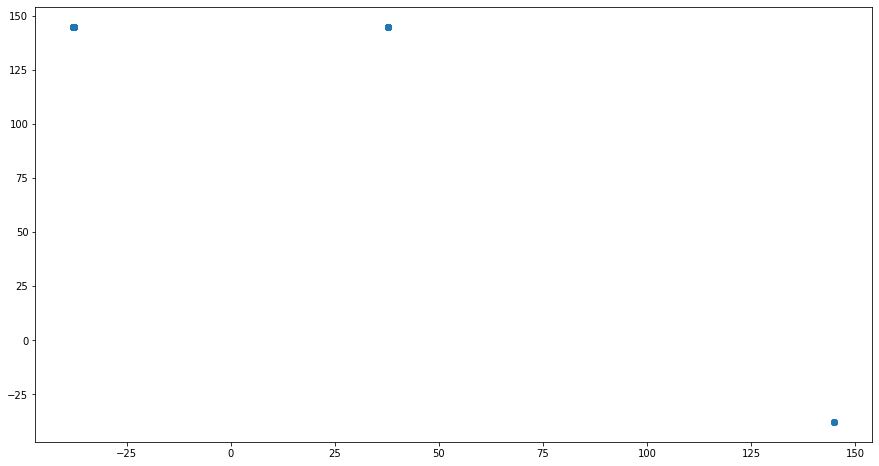

In [136]:
# Graphical verification of customer's latitudes and longitudes
plt.figure(figsize=(15,8))
plt.scatter(dirty_data['customer_lat'], dirty_data['customer_lon'])

#### Displaying rows with positive latitudes

In [137]:
dirty_data[dirty_data['customer_lat'] > 0]['customer_lat']

32      37.806231
38      37.814201
57      37.805558
62      37.814187
66      37.822164
78      37.808330
79      37.810334
93      37.824301
111     37.811952
123     37.811683
126     37.800201
159     37.807686
171     37.804087
177     37.811801
197     37.811145
200    145.001491
209     37.818655
210    145.007399
215     37.815732
217     37.817397
221     37.807752
229     37.820288
240     37.814483
254    144.988477
293     37.814088
305     37.820647
309     37.807560
336     37.816851
364     37.811904
365     37.824007
374    144.956423
389     37.812151
393     37.803311
406     37.816521
413     37.818591
414     37.809784
416     37.813115
426     37.799499
432     37.811930
433     37.818668
473     37.805815
Name: customer_lat, dtype: float64

#### There are many rows with positive latitude values

In [138]:
dirty_data[dirty_data['customer_lat'] > 0].shape

(41, 12)

#### There are total 41 rows with error latitude values

#### Now seeing if positive latitudes are more than 100. If yes then we need to swap it with corresponding longitude.

In [139]:
dirty_data.loc[dirty_data['customer_lat'] > 100]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
200,ORDC05483,2018-04-10,11:12:40,Breakfast,NS,"[('Eggs', 4), ('Coffee', 2), ('Pancake', 1)]",127.25,145.001491,-37.811394,0,9.658,14.306741
210,ORDK00150,2018-02-22,09:41:24,Breakfast,BK,"[('Coffee', 2), ('Pancake', 9), ('Eggs', 9), (...",599.25,145.007399,-37.816198,0,3.937,8.643894
254,ORDY06420,2018-02-06,09:10:59,Breakfast,TP,"[('Coffee', 8), ('Cereal', 6)]",186.00,144.988477,-37.824629,0,9.193,11.807294
374,ORDX05398,2018-07-25,14:45:38,Lunch,BK,"[('Steak', 8), ('Chicken', 3)]",456.00,144.956423,-37.811787,0,8.087,13.982012


#### In the data, it is clearly seen that customer_lon and customer_lat values have been interchanged with each other. 
#### To correct these values we need to swap these values with each other.

In [140]:
lat = dirty_data.loc[dirty_data['customer_lat'] > 100, 'customer_lat']
lat

200    145.001491
210    145.007399
254    144.988477
374    144.956423
Name: customer_lat, dtype: float64

#### There are total four latitude value with more than 100. We need to swap these four values with longitude.

#### Output before swap

In [141]:
dirty_data.loc[dirty_data['customer_lat'] > 100]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
200,ORDC05483,2018-04-10,11:12:40,Breakfast,NS,"[('Eggs', 4), ('Coffee', 2), ('Pancake', 1)]",127.25,145.001491,-37.811394,0,9.658,14.306741
210,ORDK00150,2018-02-22,09:41:24,Breakfast,BK,"[('Coffee', 2), ('Pancake', 9), ('Eggs', 9), (...",599.25,145.007399,-37.816198,0,3.937,8.643894
254,ORDY06420,2018-02-06,09:10:59,Breakfast,TP,"[('Coffee', 8), ('Cereal', 6)]",186.00,144.988477,-37.824629,0,9.193,11.807294
374,ORDX05398,2018-07-25,14:45:38,Lunch,BK,"[('Steak', 8), ('Chicken', 3)]",456.00,144.956423,-37.811787,0,8.087,13.982012


#### Swapping values

In [142]:
for i in range(len(lat)):
    dirty_data.customer_lat.iloc[lat.index[i]], dirty_data.customer_lon.iloc[lat.index[i]] = dirty_data.customer_lon.iloc[lat.index[i]], dirty_data.customer_lat.iloc[lat.index[i]]

/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Output after swap

In [143]:
dirty_data.loc[dirty_data['customer_lat'] > 100]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee


#### Checking if data is swapped or not with the corresponding latitude and longitude values.

In [144]:
dirty_data.loc[dirty_data['customer_lat'] > 0, 'customer_lat']

32     37.806231
38     37.814201
57     37.805558
62     37.814187
66     37.822164
78     37.808330
79     37.810334
93     37.824301
111    37.811952
123    37.811683
126    37.800201
159    37.807686
171    37.804087
177    37.811801
197    37.811145
209    37.818655
215    37.815732
217    37.817397
221    37.807752
229    37.820288
240    37.814483
293    37.814088
305    37.820647
309    37.807560
336    37.816851
364    37.811904
365    37.824007
389    37.812151
393    37.803311
406    37.816521
413    37.818591
414    37.809784
416    37.813115
426    37.799499
432    37.811930
433    37.818668
473    37.805815
Name: customer_lat, dtype: float64

#### From the above output, data has been interchanged.

#### Now correcting latitude values which are positive by multiplying by -1 value.

In [145]:
dirty_data.loc[dirty_data['customer_lat'] > 0,'customer_lat'] = dirty_data[dirty_data['customer_lat'] > 0]['customer_lat'] * -1

#### Verifying if the data has been corrected.

In [146]:
dirty_data[dirty_data['customer_lat'] > 0]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee


#### There are no wrong values with positive latitude now.

### 2.3.8. Now analysing <u><i>longitude data</u></i> for anomalies in dirty data.

In [147]:
dirty_data['customer_lon'].describe()

count    500.000000
mean     144.967974
std        0.020681
min      144.917232
25%      144.953342
50%      144.965138
75%      144.982908
max      145.018370
Name: customer_lon, dtype: float64

#### There are no negative longitude data in the longitude column.

In [148]:
dirty_data[dirty_data['customer_lon'] < 0].head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee


### 2.3.9. Analysing <u><i> customerHasloyalty? </u></i> column for anomalies

In [149]:
dirty_data['customerHasloyalty?'].describe()

count    500.00000
mean       0.13200
std        0.33883
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        1.00000
Name: customerHasloyalty?, dtype: float64

#### In the above output, we can see that min value is 0 and max value is 1. So there is no possibility that there will be any other value than these two.

In [150]:
dirty_data[(dirty_data['customerHasloyalty?'] > 1) & (dirty_data['customerHasloyalty?'] < 0)]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee


#### Thus, this has no column with values apart from 1 or 0.

### 2.3.10. Now, analysing <u><i>'distance_to_customer_KM'</u></i> for anomalies in dirty_data

In [151]:
dirty_data['distance_to_customer_KM'].describe()

count    500.000000
mean       8.744932
std        1.591251
min        3.234000
25%        7.838500
50%        8.868500
75%        9.735000
max       13.685000
Name: distance_to_customer_KM, dtype: float64

In [152]:
dirty_data.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX00699,2018-08-03,15:05:54,Lunch,BK,"[('Chicken', 2), ('Steak', 1)]",109.0,-37.812276,144.973739,0,6.776,12.633699
1,ORDX06260,2018-03-14,10:21:58,Breakfast,BK,"[('Cereal', 6), ('Pancake', 8), ('Coffee', 7),...",548.5,-37.817459,144.977806,0,6.833,11.839359
2,ORDI04941,2018-04-22,11:43:05,Breakfast,NS,"[('Cereal', 5), ('Pancake', 6), ('Coffee', 8),...",464.5,-37.819080,144.953533,0,9.226,16.365409
3,ORDI03372,2018-12-08,19:19:26,Dinner,NS,"[('Fish&Chips', 7), ('Shrimp', 3)]",407.0,-37.812623,144.947191,0,10.071,17.962534
4,ORDK03173,2018-11-04,18:08:27,Dinner,BK,"[('Fish&Chips', 7), ('Pasta', 6)]",410.0,-37.819301,144.961111,0,8.016,17.595995


#### Displaying branches file.

In [153]:
branches_data.head()

,branch_code,branch_name,branch_lat,branch_lon
0,NS,Nickolson,-37.773803,144.983647
1,TP,Thompson,-37.861835,144.905716
2,BK,Bakers,-37.815834,145.046450


#### Displaying nodes file.

In [154]:
nodes_data.head()

,node,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


#### Initializing edges and nodes for networkx library

In [155]:
edge_list = list(zip(edges_data.u, edges_data.v, edges_data['distance(m)']))
node_list = list(zip(nodes_data.node))

#### Initializing networkx graph for calculating dijkstra's shortest path.

In [156]:
G = nx.Graph()
G.add_nodes_from(node_list)
G.add_weighted_edges_from(edge_list)

#### Finding node values for customer and branch from given latitude and longitude from dataset and node file

In [157]:
for i in range(len(missing_data)):

    lat1 = get_nearest(nodes_data['lat'],dirty_data['customer_lat'][i])
    lon1 = get_nearest(nodes_data['lon'],dirty_data['customer_lon'][i])
    idx_lat1 = nodes_data.loc[nodes_data['lat'] == lat1].node
    idx_lon1 = nodes_data.loc[nodes_data['lon'] == lon1].node

    if idx_lat1.values[0] == idx_lon1.values[0]:
        node_source = idx_lat1.values[0] & idx_lon1.values[0]
        
    for j in range(len(branches_data)):
        if dirty_data.branch_code[i] == branches_data.branch_code[j]:
            lat2 = branches_data.branch_lat[j]
            lon2 = branches_data.branch_lon[j]
            idx_lat2 = nodes_data.loc[nodes_data['lat'] == lat2].node
            idx_lon2 = nodes_data.loc[nodes_data['lon'] == lon2].node
            #print(lat2, lon2, idx_lat2, idx_lon2)
            if idx_lat2.values[0] == idx_lon2.values[0]:
                node_target = idx_lat2.values[0] & idx_lon2.values[0]
                distance = nx.dijkstra_path_length(G, node_source, node_target)/1000
                print(distance)
                missing_data['distance_to_customer_KM'][i] = distance
                
    #break

6.776
6.833


/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


9.226
10.071
8.016
8.309
8.761
10.629
12.847
10.196
9.002
9.423
9.764
9.204
8.974
7.558
6.691
6.964
9.904
7.857
10.363
10.095
9.023
7.113
8.42
9.369
9.624
8.983
12.215
4.897
8.618
7.925
9.951
5.889
8.38
7.98
7.208
11.323
8.215
12.255
9.344
10.618
8.666
6.627
10.2
8.542
8.895
9.343
8.099
8.745
10.03
11.935
4.997
4.997
7.213
8.99
7.724
8.728
10.327
9.291
10.773
7.119
10.695
8.17
9.254
9.776
4.975
9.051
10.369
9.119
9.465
7.817
7.898
7.953
8.425
6.512
7.668
7.763
8.928
9.613
7.689
9.117
6.675
12.058
7.693
9.038
9.299
10.426
9.95
10.033
9.102
6.86
9.523
9.894
9.554
7.817
8.562
7.857
9.137
9.854
7.362
7.672
7.039
10.134
8.552
4.438
8.817
12.259
7.747
10.018
7.651
9.143
9.051
7.809
7.173
7.531
6.951
10.13
8.069
7.038
9.787
8.474
8.238
3.234
9.04
9.404
8.462
8.533
9.382
9.456
9.603
5.889
8.586
7.949
9.741
10.499
10.722
6.78
7.713
9.3
6.144
8.827
6.764
8.807
9.94
5.361
8.411
11.069
8.052
8.879
9.097
10.883
4.011
10.879
9.012
9.776
10.454
9.19
8.496
9.25
11.013
7.615
10.367
9.224
8.045
9.398
7.

#### The above output shows the distance w.r.t dijkstra's algorithm. 

In [158]:
dirty_data

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX00699,2018-08-03,15:05:54,Lunch,BK,"[('Chicken', 2), ('Steak', 1)]",109.00,-37.812276,144.973739,0,6.776,12.633699
1,ORDX06260,2018-03-14,10:21:58,Breakfast,BK,"[('Cereal', 6), ('Pancake', 8), ('Coffee', 7),...",548.50,-37.817459,144.977806,0,6.833,11.839359
2,ORDI04941,2018-04-22,11:43:05,Breakfast,NS,"[('Cereal', 5), ('Pancake', 6), ('Coffee', 8),...",464.50,-37.819080,144.953533,0,9.226,16.365409
3,ORDI03372,2018-12-08,19:19:26,Dinner,NS,"[('Fish&Chips', 7), ('Shrimp', 3)]",407.00,-37.812623,144.947191,0,10.071,17.962534
4,ORDK03173,2018-11-04,18:08:27,Dinner,BK,"[('Fish&Chips', 7), ('Pasta', 6)]",410.00,-37.819301,144.961111,0,8.016,17.595995
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDX01661,2018-04-01,10:52:23,Breakfast,BK,"[('Coffee', 10), ('Eggs', 8)]",251.00,-37.820035,144.980254,0,7.132,14.048460
496,ORDZ10029,2018-07-13,14:25:21,Lunch,NS,"[('Steak', 8), ('Chicken', 3), ('Salad', 1), (...",274.75,-37.816459,145.004164,0,10.313,16.180607
497,ORDY02674,2018-07-24,14:45:38,Lunch,TP,"[('Salad', 5), ('Chicken', 1), ('Burger', 3), ...",448.00,-37.800264,144.963587,0,9.742,12.836641
498,ORDB09235,2018-09-16,16:37:10,Dinner,TP,"[('Pasta', 1), ('Salmon', 1), ('Fish&Chips', 1...",904.50,-37.805874,144.978373,0,9.671,15.338277


####  The above output shows the corrected value of distance_to_customer_KM.

### 2.2.12. Now, analysing <u><i>'delivery_fee'</u></i> for anomalies in dirty_data

#### Creating copy of missing data

In [159]:
dirty_df_initial = dirty_data
dirty_data_copy = dirty_data

#### Finding if the order is on weekday or weekend and putting 0 if weekday and 1 if weekend in the new column = week

In [160]:
for i, j in dirty_df_initial['date'].iteritems():
    time_converted = j.weekday()
    if time_converted <= 5:
        dirty_df_initial.loc[i, 'week'] = '0'
    else:
        dirty_df_initial.loc[i, 'week'] = '1'

#### Now finding time of day and putting 0 if breakfast, 1 if lunch and 2 if dinner in the new column = time_day

In [161]:
for i, j in dirty_df_initial['order_type'].iteritems():
    if j =='Breakfast':
        dirty_df_initial.loc[i, 'time_day'] = '0'
    elif j =='Lunch':
        dirty_df_initial.loc[i, 'time_day'] = '1'
    elif j =='Dinner':
        dirty_df_initial.loc[i, 'time_day'] = '2'

#### Now finding data w.r.t branch_code and dividing it into three dataframes.

In [162]:
dirty_df_test_NS = get_branch(dirty_df_initial, 'NS')
dirty_df_test_BK = get_branch(dirty_df_initial, 'BK')
dirty_df_test_TP = get_branch(dirty_df_initial, 'TP')

#### Dropping delivery_fee

In [163]:
dirty_df_train_NS = missing_df_NS.dropna(subset = ['delivery_fee'])
dirty_df_train_BK = missing_df_BK.dropna(subset = ['delivery_fee'])
dirty_df_train_TP = missing_df_TP.dropna(subset = ['delivery_fee'])

In [164]:
dirty_df_train_NS

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,week,time_day
1,ORDZ07051,2018-01-07,08:10:08,Breakfast,NS,"[('Coffee', 2), ('Cereal', 7)]",162.00,-37.813333,144.937581,1,10.039,8.652942,1,0
3,ORDC06592,2018-05-20,12:33:48,Lunch,NS,"[('Steak', 2), ('Chicken', 7), ('Salad', 10), ...",596.00,-37.802020,144.957178,0,7.503,14.895055,1,1
5,ORDC00169,2018-03-31,10:52:23,Breakfast,NS,"[('Coffee', 9), ('Pancake', 5), ('Cereal', 4)]",272.75,-37.807320,144.958225,0,7.801,14.282421,0,0
8,ORDI06174,2018-01-26,08:50:42,Breakfast,NS,"[('Eggs', 4), ('Coffee', 10), ('Cereal', 9), (...",424.75,-37.824431,144.989129,0,9.655,14.673998,0,0
10,ORDZ01347,2018-11-10,18:18:35,Dinner,NS,"[('Pasta', 3), ('Salmon', 10)]",492.50,-37.819997,145.010830,0,11.118,19.286105,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,ORDZ02202,2018-06-26,13:44:47,Lunch,NS,"[('Salad', 10), ('Chicken', 3), ('Steak', 9)]",673.00,-37.825603,144.984572,0,9.561,14.870217,0,1
478,ORDZ00859,2018-01-13,08:20:16,Breakfast,NS,"[('Pancake', 1), ('Coffee', 5), ('Cereal', 2),...",257.75,-37.821350,144.945606,1,9.978,8.113049,0,0
480,ORDC04749,2018-03-31,10:52:23,Breakfast,NS,"[('Pancake', 7), ('Coffee', 9), ('Eggs', 9)]",435.25,-37.807125,144.958260,0,7.801,14.609917,0,0
492,ORDC01928,2018-10-14,17:27:53,Dinner,NS,"[('Salmon', 5), ('Fish&Chips', 5), ('Pasta', 4)]",490.00,-37.823916,144.983678,0,9.314,17.160676,1,2


#### The above dataset contains training data w.r.t branch_code = 'NS'. Other dataset contains data w.r.t 'BK' and 'TS'.

In [165]:
dirty_df_train_NS.shape

(128, 14)

#### The NS training dataset contains 128 set of data.

In [166]:
dirty_df_train_BK.shape

(153, 14)

#### The BK training dataset contains 153 set of data.

In [167]:
dirty_df_train_TP.shape

(169, 14)

#### The TP training dataset contains 169 set of data.

#### The below code is used to train the data and test the dataset using column week, time_day, customerHasloyalty? and distance_to_customer_KM.
#### These are the most relevant columns for calculating delivery fee.

#### Training and testing 'NS' dataset.

In [168]:
X_train_NS= dirty_df_train_NS[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_train_NS= dirty_df_train_NS['delivery_fee']
X_test_NS= dirty_df_test_NS[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_test_NS= dirty_df_test_NS['delivery_fee']

#### Fitting the trained model for 'NS' dataset.

In [169]:
regression.fit(X_train_NS, y_train_NS)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting the values from the trained model.

In [170]:
predicted_value_NS = regression.predict(X_test_NS)
predicted_value_NS

array([16.04311851, 16.49023788, 16.53807916, 14.84731191, 15.60632497,
       13.32262842, 14.36202639, 16.51470606, 15.42179413, 14.99243038,
       15.84685315, 12.52930053, 14.07698832, 18.50436049, 14.41036723,
       15.29129719, 13.43768161, 15.40635038, 14.3460627 ,  6.61474583,
       17.64593527, 14.27484832, 13.28883353, 13.51931777, 13.54072743,
       13.02376161, 16.3964432 , 15.93154783, 15.78874122, 15.44210871,
       14.43075738,  8.27313594, 15.22691708, 13.00235196, 14.42056231,
       17.89265605,  3.35741972, 15.55331059, 13.53570546, 14.24478304,
       16.20069778, 16.31853665, 15.43912576, 13.8077628 ,  9.48336678,
       15.34219699, 15.49206457, 15.63275659, 14.59149113, 13.04415176,
       15.22197069, 16.35668241, 16.88070921, 14.36346989, 16.27096822,
       15.60115186, 14.1809025 , 13.33478694, 13.65381718, 15.79654886,
        6.67293333, 15.02709363, 15.35435551, 10.06535436, 13.86500635,
       16.03240349, 14.17588053, 15.36054812,  5.43517578, 14.44

#### The prediction accuracy for the above data NS data is approximately: 90%

In [171]:
regression.score(X_train_NS, y_train_NS)*100

89.92411912883617

#### Similarly, training and testing the 'TP' dataset.

In [172]:
X_train_TP = dirty_df_train_TP[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_train_TP = dirty_df_train_TP['delivery_fee']
X_test_TP = dirty_df_test_TP[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_test_TP = dirty_df_test_TP['delivery_fee']

#### Fitting the data for branch_code = 'TP'

In [173]:
regression.fit(X_train_TP, y_train_TP)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting the values from trained model.

In [174]:
predicted_value_TP = regression.predict(X_test_TP)
predicted_value_TP

array([11.51535118, 11.86140356, 12.91158179, 13.67912168,  6.81554096,
       13.1496842 , 12.74355528, 11.65946198,  6.00287705, 13.80697731,
       11.97871827, 12.03136734, 15.22487335, 11.75192239,  6.01701743,
       11.98254629, 14.54195582,  8.52188716, 14.4077468 , 14.40126245,
       13.02606265, 12.56823228, 15.01050462, 12.50563038, 16.44195295,
       12.26717295,  5.34981802, 14.53064929, 14.03548643, 13.11946617,
       12.70833756, 13.95185372, 13.57211482, 15.10467374, 12.07347549,
       14.57428864,  6.03809477, 13.55432845, 12.12247406, 13.58742687,
       12.91257595, 15.97763823, 11.80416088, 12.15386376,  5.34981802,
       11.63879071, 11.4609934 ,  6.33915411, 13.05592115, 13.85880973,
       13.19202091, 13.45498214, 12.61569965, 14.21251814, 15.06657112,
       12.11864604, 15.38600944, 14.20202826, 14.07664694, 12.18984709,
       12.23578324,  6.85193035, 12.42217969, 12.42217969, 12.34909243,
       11.22135978, 13.70591777, 13.90897997, 12.58908106, 14.28

#### The prediction accuracy for the above TP data is approximately: 92%

In [175]:
regression.score(X_train_TP, y_train_TP)*100

91.60957426013859

#### Similarly, training and testing 'BK' the dataset.

In [176]:
X_train_BK = dirty_df_train_BK[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_train_BK = dirty_df_train_BK['delivery_fee']
X_test_BK = dirty_df_test_BK[['week','time_day','customerHasloyalty?','distance_to_customer_KM']]
y_test_BK = dirty_df_test_BK['delivery_fee']

#### Fitting the model.

In [177]:
regression.fit(X_train_BK, y_train_BK)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting the values from the trained model

In [178]:
predicted_value_BK = regression.predict(X_test_BK)
predicted_value_BK

array([13.0175881 , 12.18203992, 16.85864191, 13.82400995, 13.36814432,
       13.83287888, 11.06300309, 13.31796692, 12.09490747, 16.58373002,
       12.8625944 , 10.27218464, 14.99222958, 13.47216694, 14.15326855,
       18.07021325, 15.92555902, 16.19939346, 14.70042752, 11.14414073,
       14.99530464, 15.62776216, 13.63780946, 13.14945027, 12.91252525,
       18.19325211, 14.86195475, 12.73231957, 15.84234092, 10.58553927,
       15.14068975, 10.65637886, 13.46775949, 14.05161855, 10.22794801,
       12.98974854, 15.79523857, 10.51070158, 13.13617388, 13.00510539,
       10.65082697, 14.34491672, 16.10002485, 17.42660541,  7.83707372,
       13.44279406, 13.62200513, 15.26056231, 11.87309274, 13.92362511,
       15.65376781, 14.95656971, 16.25813923, 13.28804691, 12.6657451 ,
       15.30113113, 17.26279679, 12.91123848, 14.00060185, 14.8585419 ,
       13.48489621, 13.92778601,  8.75975435, 11.67961067,  9.16954488,
        9.47492846, 15.06604002, 11.86685138, 17.08199837,  9.18

#### The prediction accuracy for the above TP data is approximately: 94%

In [179]:
regression.score(X_train_BK, y_train_BK)*100

94.04349488726935

#### Assigning the predicted values to missing test dataframe.

In [180]:
dirty_df_test_NS['predicted_delivery_fee'] = predicted_value_NS
dirty_df_test_TP['predicted_delivery_fee'] = predicted_value_TP
dirty_df_test_BK['predicted_delivery_fee'] = predicted_value_BK

/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to 

In [181]:
dirty_df_test_BK.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,week,time_day,predicted_delivery_fee
0,ORDX00699,2018-08-03,15:05:54,Lunch,BK,"[('Chicken', 2), ('Steak', 1)]",109.00,-37.812276,144.973739,0,6.776,12.633699,0,1,13.017588
1,ORDX06260,2018-03-14,10:21:58,Breakfast,BK,"[('Cereal', 6), ('Pancake', 8), ('Coffee', 7),...",548.50,-37.817459,144.977806,0,6.833,11.839359,0,0,12.182040
4,ORDK03173,2018-11-04,18:08:27,Dinner,BK,"[('Fish&Chips', 7), ('Pasta', 6)]",410.00,-37.819301,144.961111,0,8.016,17.595995,1,2,16.858642
16,ORDK04564,2018-09-19,16:37:10,Dinner,BK,"[('Shrimp', 6), ('Pasta', 10), ('Fish&Chips', ...",821.00,-37.798794,144.982731,0,6.691,13.838614,0,2,13.824010
23,ORDX10183,2018-11-12,18:28:43,Lunch,BK,"[('Fish&Chips', 3), ('Salmon', 7), ('Shrimp', 6)]",716.00,-37.804963,144.978720,0,7.113,13.535879,0,1,13.368144
24,ORDA10507,2018-02-03,09:00:50,Breakfast,BK,"[('Eggs', 10), ('Coffee', 6), ('Pancake', 10)]",173.00,-37.823188,144.960796,0,8.420,15.913213,0,0,13.832879
29,ORDX02818,2018-08-30,15:56:37,Lunch,BK,"[('Fries', 3), ('Salad', 1), ('Fish&Chips', 8)]",301.20,-37.809746,144.991343,0,4.897,10.778388,0,1,11.063003
31,ORDK06897,2018-03-21,10:32:06,Breakfast,BK,"[('Eggs', 6), ('Cereal', 3), ('Pancake', 9), (...",488.25,-37.813930,144.960373,0,7.925,12.583325,0,0,13.317967
33,ORDA05281,2018-07-31,14:55:46,Lunch,BK,"[('Burger', 3), ('Steak', 10), ('Fries', 4)]",591.00,-37.812725,144.983262,0,5.889,11.417629,0,1,12.094907
40,ORDX00397,2018-09-25,16:47:19,Dinner,BK,"[('Shrimp', 7), ('Pasta', 1)]",405.50,-37.820981,144.947346,0,9.344,16.434796,0,2,16.583730


#### Now finding the residual value from predicted delivery fee with delivery fee.

In [182]:
dirty_df_test_NS['residual_value'] = dirty_df_test_NS['delivery_fee'] - dirty_df_test_NS['predicted_delivery_fee']
dirty_df_test_TP['residual_value'] = dirty_df_test_TP['delivery_fee'] - dirty_df_test_TP['predicted_delivery_fee']
dirty_df_test_BK['residual_value'] = dirty_df_test_BK['delivery_fee'] - dirty_df_test_BK['predicted_delivery_fee']

/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to 

#### Concatening the dataframe into one and dropping unnecessary columns.

In [183]:
dirty_df_merged = pd.concat([dirty_df_test_NS,  dirty_df_test_TP, dirty_df_test_BK])
del dirty_df_merged['week']
del dirty_df_merged['time_day']
dirty_df_merged = dirty_df_merged.sort_index()
dirty_df_merged.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,predicted_delivery_fee,residual_value
0,ORDX00699,2018-08-03,15:05:54,Lunch,BK,"[('Chicken', 2), ('Steak', 1)]",109.00,-37.812276,144.973739,0,6.776,12.633699,13.017588,-0.383889
1,ORDX06260,2018-03-14,10:21:58,Breakfast,BK,"[('Cereal', 6), ('Pancake', 8), ('Coffee', 7),...",548.50,-37.817459,144.977806,0,6.833,11.839359,12.182040,-0.342681
2,ORDI04941,2018-04-22,11:43:05,Breakfast,NS,"[('Cereal', 5), ('Pancake', 6), ('Coffee', 8),...",464.50,-37.819080,144.953533,0,9.226,16.365409,16.043119,0.322291
3,ORDI03372,2018-12-08,19:19:26,Dinner,NS,"[('Fish&Chips', 7), ('Shrimp', 3)]",407.00,-37.812623,144.947191,0,10.071,17.962534,16.490238,1.472296
4,ORDK03173,2018-11-04,18:08:27,Dinner,BK,"[('Fish&Chips', 7), ('Pasta', 6)]",410.00,-37.819301,144.961111,0,8.016,17.595995,16.858642,0.737353
5,ORDB02744,2018-02-27,09:51:32,Breakfast,TP,"[('Eggs', 1), ('Coffee', 2), ('Cereal', 9)]",226.00,-37.822697,144.975032,0,8.309,11.281539,11.515351,-0.233812
6,ORDB07772,2018-01-23,08:40:33,Breakfast,TP,"[('Eggs', 5), ('Coffee', 10), ('Pancake', 1)]",209.25,-37.820526,144.980699,0,8.761,11.771571,11.861404,-0.089832
7,ORDI02220,2018-07-14,14:25:21,Lunch,NS,"[('Steak', 8), ('Chicken', 4), ('Burger', 10)]",798.00,-37.819218,145.005683,0,10.629,18.722283,16.538079,2.184204
8,ORDY07813,2018-07-15,14:25:21,Lunch,TP,"[('Salad', 7), ('Burger', 10), ('Fries', 8), (...",1065.40,-37.800007,144.935683,0,7.651,17.116631,12.911582,4.205049
9,ORDJ02557,2018-05-18,12:33:48,Lunch,TP,"[('Chicken', 4), ('Burger', 4)]",252.00,-37.804451,144.943278,0,10.196,13.237625,13.679122,-0.441496


#### The below matrix shows the interdependency between various columns of the same dataframe with each other.

In [184]:
corr = dirty_df_merged.corr()
corr.style.background_gradient(cmap='coolwarm')

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,predicted_delivery_fee,residual_value
order_price,1,0.0434016,-0.0768868,-0.102863,0.0540141,0.307086,0.20581,0.088998
customer_lat,0.0434016,1,-0.161284,0.0668771,0.106524,0.0113307,-0.0140716,0.0350409
customer_lon,-0.0768868,-0.161284,1,-0.0731133,-0.213896,-0.143363,-0.124941,0.000751729
customerHasloyalty?,-0.102863,0.0668771,-0.0731133,1,-0.0113496,-0.42945,-0.806468,0.63577
distance_to_customer_KM,0.0540141,0.106524,-0.213896,-0.0113496,1,0.398467,0.36436,-0.0271494
delivery_fee,0.307086,0.0113307,-0.143363,-0.42945,0.398467,1,0.741919,0.184692
predicted_delivery_fee,0.20581,-0.0140716,-0.124941,-0.806468,0.36436,0.741919,1,-0.521928
residual_value,0.088998,0.0350409,0.000751729,0.63577,-0.0271494,0.184692,-0.521928,1


#### Now finding data with residual value < 1.3 and > - 1.3 so that we can rectify the data with correct values with the predicted values.
#### Our assumptin is that the data between these limits are correct.

In [185]:
dirty_data_limit = dirty_df_merged[(pd.to_numeric(dirty_df_merged['residual_value']) < 1.3) & (pd.to_numeric(dirty_df_merged['residual_value']) > -1.3)]
dirty_data_limit

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,predicted_delivery_fee,residual_value
0,ORDX00699,2018-08-03,15:05:54,Lunch,BK,"[('Chicken', 2), ('Steak', 1)]",109.00,-37.812276,144.973739,0,6.776,12.633699,13.017588,-0.383889
1,ORDX06260,2018-03-14,10:21:58,Breakfast,BK,"[('Cereal', 6), ('Pancake', 8), ('Coffee', 7),...",548.50,-37.817459,144.977806,0,6.833,11.839359,12.182040,-0.342681
2,ORDI04941,2018-04-22,11:43:05,Breakfast,NS,"[('Cereal', 5), ('Pancake', 6), ('Coffee', 8),...",464.50,-37.819080,144.953533,0,9.226,16.365409,16.043119,0.322291
4,ORDK03173,2018-11-04,18:08:27,Dinner,BK,"[('Fish&Chips', 7), ('Pasta', 6)]",410.00,-37.819301,144.961111,0,8.016,17.595995,16.858642,0.737353
5,ORDB02744,2018-02-27,09:51:32,Breakfast,TP,"[('Eggs', 1), ('Coffee', 2), ('Cereal', 9)]",226.00,-37.822697,144.975032,0,8.309,11.281539,11.515351,-0.233812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDX01661,2018-04-01,10:52:23,Breakfast,BK,"[('Coffee', 10), ('Eggs', 8)]",251.00,-37.820035,144.980254,0,7.132,14.048460,14.149400,-0.100940
496,ORDZ10029,2018-07-13,14:25:21,Lunch,NS,"[('Steak', 8), ('Chicken', 3), ('Salad', 1), (...",274.75,-37.816459,145.004164,0,10.313,16.180607,16.215915,-0.035308
497,ORDY02674,2018-07-24,14:45:38,Lunch,TP,"[('Salad', 5), ('Chicken', 1), ('Burger', 3), ...",448.00,-37.800264,144.963587,0,9.742,12.836641,13.331538,-0.494897
498,ORDB09235,2018-09-16,16:37:10,Dinner,TP,"[('Pasta', 1), ('Salmon', 1), ('Fish&Chips', 1...",904.50,-37.805874,144.978373,0,9.671,15.338277,15.177177,0.161099


#### Now finding data with incorrect values

In [186]:
dirty_data_solve = dirty_df_merged[(pd.to_numeric(dirty_df_merged['residual_value']) > 1.3) | (pd.to_numeric(dirty_df_merged['residual_value']) < -1.3)]
dirty_data_solve

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,predicted_delivery_fee,residual_value
3,ORDI03372,2018-12-08,19:19:26,Dinner,NS,"[('Fish&Chips', 7), ('Shrimp', 3)]",407.00,-37.812623,144.947191,0,10.071,17.962534,16.490238,1.472296
7,ORDI02220,2018-07-14,14:25:21,Lunch,NS,"[('Steak', 8), ('Chicken', 4), ('Burger', 10)]",798.00,-37.819218,145.005683,0,10.629,18.722283,16.538079,2.184204
8,ORDY07813,2018-07-15,14:25:21,Lunch,TP,"[('Salad', 7), ('Burger', 10), ('Fries', 8), (...",1065.40,-37.800007,144.935683,0,7.651,17.116631,12.911582,4.205049
12,ORDJ08517,2018-06-17,13:24:30,Lunch,TP,"[('Chicken', 10), ('Fries', 8), ('Burger', 4),...",767.60,-37.800506,144.964703,0,7.962,14.652291,13.149684,1.502607
15,ORDB07869,2018-06-02,13:04:13,Lunch,TP,"[('Salad', 10), ('Fries', 10), ('Chicken', 6),...",912.00,-37.818257,144.964818,0,7.558,12.980061,11.659462,1.320599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,ORDJ03712,2018-02-11,09:21:07,Breakfast,TP,"[('Pancake', 1), ('Cereal', 3), ('Coffee', 6),...",242.25,-37.816046,144.972220,1,8.189,12.280509,5.870787,6.409722
475,ORDA07144,2018-03-07,10:11:49,Breakfast,BK,"[('Pancake', 5), ('Cereal', 7), ('Coffee', 9)]",335.75,-37.807834,144.973047,0,10.313,10.960011,15.802027,-4.842016
481,ORDA04384,2018-03-17,10:21:58,Breakfast,BK,"[('Pancake', 2), ('Coffee', 1), ('Cereal', 4),...",184.00,-37.820634,144.983636,0,6.497,13.957652,11.832524,2.125128
488,ORDJ10531,2018-03-21,10:32:06,Breakfast,TP,"[('Pancake', 4), ('Cereal', 10), ('Eggs', 8)]",483.00,-37.815876,144.961201,1,8.111,10.966971,4.630152,6.336820


#### Now that we have found the data with incorrect delivery fees, we can substitute the delivery fees with predicted delivery fees.

In [187]:
dirty_data_solve['delivery_fee'] = dirty_data_solve['predicted_delivery_fee']
dirty_data_solve

/Users/shikharanand/anaconda3/envs/Programming_Python_R/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,predicted_delivery_fee,residual_value
3,ORDI03372,2018-12-08,19:19:26,Dinner,NS,"[('Fish&Chips', 7), ('Shrimp', 3)]",407.00,-37.812623,144.947191,0,10.071,16.490238,16.490238,1.472296
7,ORDI02220,2018-07-14,14:25:21,Lunch,NS,"[('Steak', 8), ('Chicken', 4), ('Burger', 10)]",798.00,-37.819218,145.005683,0,10.629,16.538079,16.538079,2.184204
8,ORDY07813,2018-07-15,14:25:21,Lunch,TP,"[('Salad', 7), ('Burger', 10), ('Fries', 8), (...",1065.40,-37.800007,144.935683,0,7.651,12.911582,12.911582,4.205049
12,ORDJ08517,2018-06-17,13:24:30,Lunch,TP,"[('Chicken', 10), ('Fries', 8), ('Burger', 4),...",767.60,-37.800506,144.964703,0,7.962,13.149684,13.149684,1.502607
15,ORDB07869,2018-06-02,13:04:13,Lunch,TP,"[('Salad', 10), ('Fries', 10), ('Chicken', 6),...",912.00,-37.818257,144.964818,0,7.558,11.659462,11.659462,1.320599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,ORDJ03712,2018-02-11,09:21:07,Breakfast,TP,"[('Pancake', 1), ('Cereal', 3), ('Coffee', 6),...",242.25,-37.816046,144.972220,1,8.189,5.870787,5.870787,6.409722
475,ORDA07144,2018-03-07,10:11:49,Breakfast,BK,"[('Pancake', 5), ('Cereal', 7), ('Coffee', 9)]",335.75,-37.807834,144.973047,0,10.313,15.802027,15.802027,-4.842016
481,ORDA04384,2018-03-17,10:21:58,Breakfast,BK,"[('Pancake', 2), ('Coffee', 1), ('Cereal', 4),...",184.00,-37.820634,144.983636,0,6.497,11.832524,11.832524,2.125128
488,ORDJ10531,2018-03-21,10:32:06,Breakfast,TP,"[('Pancake', 4), ('Cereal', 10), ('Eggs', 8)]",483.00,-37.815876,144.961201,1,8.111,4.630152,4.630152,6.336820


In [188]:
dirty_data_solution = pd.concat([dirty_data_limit,  dirty_data_solve])
del dirty_data_solution['predicted_delivery_fee']
del dirty_data_solution['residual_value']
dirty_data_solution = dirty_data_solution.sort_index()
dirty_data_solution.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX00699,2018-08-03,15:05:54,Lunch,BK,"[('Chicken', 2), ('Steak', 1)]",109.00,-37.812276,144.973739,0,6.776,12.633699
1,ORDX06260,2018-03-14,10:21:58,Breakfast,BK,"[('Cereal', 6), ('Pancake', 8), ('Coffee', 7),...",548.50,-37.817459,144.977806,0,6.833,11.839359
2,ORDI04941,2018-04-22,11:43:05,Breakfast,NS,"[('Cereal', 5), ('Pancake', 6), ('Coffee', 8),...",464.50,-37.819080,144.953533,0,9.226,16.365409
3,ORDI03372,2018-12-08,19:19:26,Dinner,NS,"[('Fish&Chips', 7), ('Shrimp', 3)]",407.00,-37.812623,144.947191,0,10.071,16.490238
4,ORDK03173,2018-11-04,18:08:27,Dinner,BK,"[('Fish&Chips', 7), ('Pasta', 6)]",410.00,-37.819301,144.961111,0,8.016,17.595995
5,ORDB02744,2018-02-27,09:51:32,Breakfast,TP,"[('Eggs', 1), ('Coffee', 2), ('Cereal', 9)]",226.00,-37.822697,144.975032,0,8.309,11.281539
6,ORDB07772,2018-01-23,08:40:33,Breakfast,TP,"[('Eggs', 5), ('Coffee', 10), ('Pancake', 1)]",209.25,-37.820526,144.980699,0,8.761,11.771571
7,ORDI02220,2018-07-14,14:25:21,Lunch,NS,"[('Steak', 8), ('Chicken', 4), ('Burger', 10)]",798.00,-37.819218,145.005683,0,10.629,16.538079
8,ORDY07813,2018-07-15,14:25:21,Lunch,TP,"[('Salad', 7), ('Burger', 10), ('Fries', 8), (...",1065.40,-37.800007,144.935683,0,7.651,12.911582
9,ORDJ02557,2018-05-18,12:33:48,Lunch,TP,"[('Chicken', 4), ('Burger', 4)]",252.00,-37.804451,144.943278,0,10.196,13.237625


In [189]:
dirty_data_solution.shape

(500, 12)

In [190]:
dirty_data_solution_csv = dirty_data_solution.to_csv('Group145_dirty_data_solution.csv')

#### The output file has been written.

## 3. Summary

<b>The task starts with the dirty data analysis and assessing all of the columns for the given data. The various syntactic, semantic, and coverage errors were went through, and data in it's purest form was generated by using various methods and libraries for the assigned task. The task of assessing and analysing the missing data was done profoundly. The missing branch code was generated and imputed by using the order ID and corresponding branch code assessment, the distance to customer was predicted by using longitude and lattitude of the customer's location and the djikstra algorithm for shortest path and then imputing it. The delivery fee was generated by using linear regression for it and training the best suited columns from the provided dataset to get most suitable value and good prediction. The remaining task of determining the outliers is done by using the linear regression approach, as well as, normal boxplot based prediction and IQR methodology to determine the outliers and distinguish them with the prediction.</b>